In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# 加载情绪结果文件
finbert_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_finbert.xlsx')
textblob_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_textblob.xlsx')
vader_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_vader.xlsx')

# 加载市场指数数据
spxd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/_SPXD.xlsx', sheet_name='Price Data')
spxtrd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/_SPXTRD.xlsx', sheet_name='Price Data')
vixd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/VIXD.xlsx', sheet_name='Price Data')

# 确保日期列为datetime类型
finbert_data['Date'] = pd.to_datetime(finbert_data['Date'])
textblob_data['Date'] = pd.to_datetime(textblob_data['Date'])
vader_data['Date'] = pd.to_datetime(vader_data['Date'])
spxd_data['Date'] = pd.to_datetime(spxd_data['Date'])
spxtrd_data['Date'] = pd.to_datetime(spxtrd_data['Date'])
vixd_data['Date'] = pd.to_datetime(vixd_data['Date'])

# 将情绪得分扩展到每日
def expand_to_daily(data):
    daily_data = data.set_index('Date').resample('D').ffill().reset_index()
    return daily_data

finbert_data_daily = expand_to_daily(finbert_data)
textblob_data_daily = expand_to_daily(textblob_data)
vader_data_daily = expand_to_daily(vader_data)

# 合并情绪得分数据
sentiment_data = pd.merge(finbert_data_daily, textblob_data_daily, on='Date', how='outer', suffixes=('_finbert', '_textblob'))
sentiment_data = pd.merge(sentiment_data, vader_data_daily, on='Date', how='outer')

# 合并市场指数数据
market_data = pd.merge(spxd_data, spxtrd_data, on='Date', how='outer', suffixes=('_spxd', '_spxtrd'))
market_data = pd.merge(market_data, vixd_data, on='Date', how='outer')

# 合并所有数据
data = pd.merge(sentiment_data, market_data, on='Date', how='outer')
data.set_index('Date', inplace=True)

# 删除所有包含 NaN 值的行
data = data.dropna()

# 检查合并后的日期范围
print("Merged Data Date Range:")
print(data.index.min(), data.index.max())




C:\Users\22749\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\22749\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\22749\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\22749\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\f

Merged Data Date Range:
2021-12-17 00:00:00 2022-12-30 00:00:00


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 155 samples, validate on 52 samples
Epoch 1/1700
155/155 [==============================] - 2s 12ms/sample - loss: 674.1325 - val_loss: 613.8204
Epoch 2/1700
155/155 [==============================] - 0s 502us/sample - loss: 663.4942 - val_loss: 602.6122
Epoch 3/1700
155/155 [==============================] - 0s 459us/sample - loss: 649.7999 - val_loss: 587.1258
Epoch 4/1700
155/155 [==============================] - 0s 453us/sample - loss: 631.3748 - val_loss: 563.7822
Epoch 5/1700
155/155 [==============================] - 0s 402us/sample - loss: 601.6867 - val_loss: 528.2419
Epoch 6/1700
155/155 [==============================] - 0s 439us/sample - loss: 560.3810 - val_loss: 474.7971
Epoch 7/1700
155/155 [==============================] - 0s 382us/sample - loss: 497.5378 - val_loss: 396.1563
Epoch 8/1700
155/155 [==============================] - 0s 373us/sam

155/155 [==============================] - 0s 313us/sample - loss: 9.7400 - val_loss: 5.8476
Epoch 73/1700
155/155 [==============================] - 0s 314us/sample - loss: 8.9156 - val_loss: 5.6730
Epoch 74/1700
155/155 [==============================] - 0s 303us/sample - loss: 9.5741 - val_loss: 5.4791
Epoch 75/1700
155/155 [==============================] - 0s 369us/sample - loss: 10.5316 - val_loss: 5.4143
Epoch 76/1700
155/155 [==============================] - 0s 329us/sample - loss: 9.0432 - val_loss: 5.4271
Epoch 77/1700
155/155 [==============================] - 0s 309us/sample - loss: 7.9929 - val_loss: 5.2251
Epoch 78/1700
155/155 [==============================] - 0s 299us/sample - loss: 9.5088 - val_loss: 5.4825
Epoch 79/1700
155/155 [==============================] - 0s 315us/sample - loss: 9.2602 - val_loss: 5.4788
Epoch 80/1700
155/155 [==============================] - 0s 305us/sample - loss: 10.0183 - val_loss: 5.1612
Epoch 81/1700
155/155 [==========================

155/155 [==============================] - 0s 456us/sample - loss: 5.0705 - val_loss: 1.4719
Epoch 149/1700
155/155 [==============================] - 0s 562us/sample - loss: 4.9832 - val_loss: 2.2616
Epoch 150/1700
155/155 [==============================] - 0s 470us/sample - loss: 5.0497 - val_loss: 2.0575
Epoch 151/1700
155/155 [==============================] - 0s 420us/sample - loss: 5.8490 - val_loss: 1.6655
Epoch 152/1700
155/155 [==============================] - 0s 420us/sample - loss: 5.9794 - val_loss: 1.8174
Epoch 153/1700
155/155 [==============================] - 0s 447us/sample - loss: 5.4636 - val_loss: 1.3922
Epoch 154/1700
155/155 [==============================] - 0s 420us/sample - loss: 5.0135 - val_loss: 4.4430
Epoch 155/1700
155/155 [==============================] - 0s 483us/sample - loss: 5.7646 - val_loss: 3.5013
Epoch 156/1700
155/155 [==============================] - 0s 411us/sample - loss: 5.7267 - val_loss: 1.5301
Epoch 157/1700
155/155 [===================

Epoch 224/1700
155/155 [==============================] - 0s 351us/sample - loss: 4.7433 - val_loss: 2.0220
Epoch 225/1700
155/155 [==============================] - 0s 341us/sample - loss: 4.9969 - val_loss: 2.8725
Epoch 226/1700
155/155 [==============================] - 0s 430us/sample - loss: 3.8308 - val_loss: 1.3372
Epoch 227/1700
155/155 [==============================] - 0s 414us/sample - loss: 3.9753 - val_loss: 3.0944
Epoch 228/1700
155/155 [==============================] - 0s 378us/sample - loss: 3.5560 - val_loss: 2.6343
Epoch 229/1700
155/155 [==============================] - 0s 327us/sample - loss: 4.7105 - val_loss: 1.0190
Epoch 230/1700
155/155 [==============================] - 0s 361us/sample - loss: 4.4596 - val_loss: 2.3768
Epoch 231/1700
155/155 [==============================] - 0s 364us/sample - loss: 4.1014 - val_loss: 1.6842
Epoch 232/1700
155/155 [==============================] - 0s 354us/sample - loss: 4.0339 - val_loss: 1.1911
Epoch 233/1700
155/155 [====

Epoch 300/1700
155/155 [==============================] - 0s 337us/sample - loss: 2.5879 - val_loss: 1.6812
Epoch 301/1700
155/155 [==============================] - 0s 324us/sample - loss: 3.6469 - val_loss: 2.7007
Epoch 302/1700
155/155 [==============================] - 0s 349us/sample - loss: 3.2833 - val_loss: 1.5495
Epoch 303/1700
155/155 [==============================] - 0s 330us/sample - loss: 3.8485 - val_loss: 2.4961
Epoch 304/1700
155/155 [==============================] - 0s 374us/sample - loss: 3.7632 - val_loss: 2.1002
Epoch 305/1700
155/155 [==============================] - 0s 372us/sample - loss: 3.6403 - val_loss: 1.7962
Epoch 306/1700
155/155 [==============================] - 0s 370us/sample - loss: 3.6502 - val_loss: 2.1006
Epoch 307/1700
155/155 [==============================] - 0s 313us/sample - loss: 3.7379 - val_loss: 1.6937
Epoch 308/1700
155/155 [==============================] - 0s 338us/sample - loss: 2.8250 - val_loss: 1.6418
Epoch 309/1700
155/155 [====

Epoch 376/1700
155/155 [==============================] - 0s 498us/sample - loss: 2.9289 - val_loss: 3.1345
Epoch 377/1700
155/155 [==============================] - 0s 545us/sample - loss: 3.8743 - val_loss: 1.1365
Epoch 378/1700
155/155 [==============================] - 0s 547us/sample - loss: 3.1831 - val_loss: 2.6624
Epoch 379/1700
155/155 [==============================] - 0s 461us/sample - loss: 3.7154 - val_loss: 1.6280
Epoch 380/1700
155/155 [==============================] - 0s 463us/sample - loss: 3.6279 - val_loss: 1.4222
Epoch 381/1700
155/155 [==============================] - 0s 425us/sample - loss: 3.2001 - val_loss: 2.9694
Epoch 382/1700
155/155 [==============================] - 0s 461us/sample - loss: 3.8966 - val_loss: 1.7588
Epoch 383/1700
155/155 [==============================] - 0s 410us/sample - loss: 3.9553 - val_loss: 1.5312
Epoch 384/1700
155/155 [==============================] - 0s 402us/sample - loss: 2.6003 - val_loss: 2.3472
Epoch 385/1700
155/155 [====

Epoch 452/1700
155/155 [==============================] - 0s 446us/sample - loss: 3.3092 - val_loss: 1.9318
Epoch 453/1700
155/155 [==============================] - 0s 431us/sample - loss: 2.7265 - val_loss: 1.1645
Epoch 454/1700
155/155 [==============================] - 0s 456us/sample - loss: 2.4162 - val_loss: 2.4804
Epoch 455/1700
155/155 [==============================] - 0s 471us/sample - loss: 3.2220 - val_loss: 1.3387
Epoch 456/1700
155/155 [==============================] - 0s 449us/sample - loss: 2.9723 - val_loss: 2.0487
Epoch 457/1700
155/155 [==============================] - 0s 414us/sample - loss: 2.6606 - val_loss: 1.4103
Epoch 458/1700
155/155 [==============================] - 0s 450us/sample - loss: 2.8204 - val_loss: 1.8100
Epoch 459/1700
155/155 [==============================] - 0s 460us/sample - loss: 2.5949 - val_loss: 2.4003
Epoch 460/1700
155/155 [==============================] - 0s 420us/sample - loss: 2.6719 - val_loss: 1.8080
Epoch 461/1700
155/155 [====

Epoch 528/1700
155/155 [==============================] - 0s 446us/sample - loss: 2.3789 - val_loss: 2.0840
Epoch 529/1700
155/155 [==============================] - 0s 428us/sample - loss: 2.6956 - val_loss: 1.7198
Epoch 530/1700
155/155 [==============================] - 0s 403us/sample - loss: 2.8127 - val_loss: 1.0381
Epoch 531/1700
155/155 [==============================] - 0s 423us/sample - loss: 2.4745 - val_loss: 2.3264
Epoch 532/1700
155/155 [==============================] - 0s 419us/sample - loss: 2.6656 - val_loss: 1.7456
Epoch 533/1700
155/155 [==============================] - 0s 368us/sample - loss: 3.1178 - val_loss: 1.3653
Epoch 534/1700
155/155 [==============================] - 0s 378us/sample - loss: 2.7742 - val_loss: 1.4162
Epoch 535/1700
155/155 [==============================] - 0s 388us/sample - loss: 2.5180 - val_loss: 1.1620
Epoch 536/1700
155/155 [==============================] - 0s 417us/sample - loss: 3.0799 - val_loss: 2.1958
Epoch 537/1700
155/155 [====

Epoch 604/1700
155/155 [==============================] - 0s 565us/sample - loss: 2.3837 - val_loss: 1.8135
Epoch 605/1700
155/155 [==============================] - 0s 543us/sample - loss: 2.3506 - val_loss: 1.5101
Epoch 606/1700
155/155 [==============================] - 0s 489us/sample - loss: 2.9493 - val_loss: 1.7546
Epoch 607/1700
155/155 [==============================] - 0s 485us/sample - loss: 2.1391 - val_loss: 1.9421
Epoch 608/1700
155/155 [==============================] - 0s 470us/sample - loss: 2.7263 - val_loss: 1.3480
Epoch 609/1700
155/155 [==============================] - 0s 488us/sample - loss: 2.6518 - val_loss: 1.5035
Epoch 610/1700
155/155 [==============================] - 0s 454us/sample - loss: 3.0703 - val_loss: 2.1881
Epoch 611/1700
155/155 [==============================] - 0s 495us/sample - loss: 3.1996 - val_loss: 1.1491
Epoch 612/1700
155/155 [==============================] - 0s 499us/sample - loss: 2.2642 - val_loss: 1.8136
Epoch 613/1700
155/155 [====

Epoch 680/1700
155/155 [==============================] - 0s 508us/sample - loss: 2.2390 - val_loss: 1.2694
Epoch 681/1700
155/155 [==============================] - 0s 530us/sample - loss: 2.0436 - val_loss: 1.9707
Epoch 682/1700
155/155 [==============================] - 0s 785us/sample - loss: 1.8755 - val_loss: 1.7859
Epoch 683/1700
155/155 [==============================] - 0s 627us/sample - loss: 2.0159 - val_loss: 1.0901
Epoch 684/1700
155/155 [==============================] - 0s 672us/sample - loss: 2.6000 - val_loss: 1.7614
Epoch 685/1700
155/155 [==============================] - 0s 570us/sample - loss: 2.3607 - val_loss: 2.3674
Epoch 686/1700
155/155 [==============================] - 0s 577us/sample - loss: 2.9524 - val_loss: 1.1002
Epoch 687/1700
155/155 [==============================] - 0s 549us/sample - loss: 2.1635 - val_loss: 2.2683
Epoch 688/1700
155/155 [==============================] - 0s 511us/sample - loss: 2.4479 - val_loss: 1.5496
Epoch 689/1700
155/155 [====

Epoch 756/1700
155/155 [==============================] - 0s 550us/sample - loss: 2.0776 - val_loss: 1.8765
Epoch 757/1700
155/155 [==============================] - 0s 535us/sample - loss: 1.7638 - val_loss: 1.2007
Epoch 758/1700
155/155 [==============================] - 0s 558us/sample - loss: 2.4044 - val_loss: 1.5699
Epoch 759/1700
155/155 [==============================] - 0s 571us/sample - loss: 2.5271 - val_loss: 1.7933
Epoch 760/1700
155/155 [==============================] - 0s 562us/sample - loss: 2.1961 - val_loss: 1.5479
Epoch 761/1700
155/155 [==============================] - 0s 537us/sample - loss: 2.3447 - val_loss: 1.6213
Epoch 762/1700
155/155 [==============================] - 0s 548us/sample - loss: 1.7134 - val_loss: 1.1597
Epoch 763/1700
155/155 [==============================] - 0s 626us/sample - loss: 2.4531 - val_loss: 1.8633
Epoch 764/1700
155/155 [==============================] - 0s 703us/sample - loss: 2.4429 - val_loss: 1.2812
Epoch 765/1700
155/155 [====

Epoch 832/1700
155/155 [==============================] - 0s 537us/sample - loss: 2.1040 - val_loss: 1.3065
Epoch 833/1700
155/155 [==============================] - 0s 490us/sample - loss: 2.0580 - val_loss: 1.4450
Epoch 834/1700
155/155 [==============================] - 0s 418us/sample - loss: 2.0190 - val_loss: 1.6424
Epoch 835/1700
155/155 [==============================] - 0s 451us/sample - loss: 1.9388 - val_loss: 1.6178
Epoch 836/1700
155/155 [==============================] - 0s 421us/sample - loss: 1.8308 - val_loss: 1.2916
Epoch 837/1700
155/155 [==============================] - 0s 629us/sample - loss: 2.3294 - val_loss: 1.3693
Epoch 838/1700
155/155 [==============================] - 0s 686us/sample - loss: 2.1874 - val_loss: 1.3412
Epoch 839/1700
155/155 [==============================] - 0s 569us/sample - loss: 2.4321 - val_loss: 1.2807
Epoch 840/1700
155/155 [==============================] - 0s 587us/sample - loss: 2.0236 - val_loss: 1.4155
Epoch 841/1700
155/155 [====

Epoch 908/1700
155/155 [==============================] - 0s 473us/sample - loss: 2.0406 - val_loss: 1.4891
Epoch 909/1700
155/155 [==============================] - 0s 443us/sample - loss: 2.0159 - val_loss: 1.9692
Epoch 910/1700
155/155 [==============================] - 0s 421us/sample - loss: 1.6782 - val_loss: 1.2215
Epoch 911/1700
155/155 [==============================] - 0s 434us/sample - loss: 1.9522 - val_loss: 1.4354
Epoch 912/1700
155/155 [==============================] - 0s 418us/sample - loss: 1.8566 - val_loss: 1.6951
Epoch 913/1700
155/155 [==============================] - 0s 577us/sample - loss: 1.9522 - val_loss: 1.3712
Epoch 914/1700
155/155 [==============================] - 0s 594us/sample - loss: 1.6625 - val_loss: 1.7179
Epoch 915/1700
155/155 [==============================] - 0s 544us/sample - loss: 1.9605 - val_loss: 1.3252
Epoch 916/1700
155/155 [==============================] - 0s 580us/sample - loss: 2.6228 - val_loss: 1.5732
Epoch 917/1700
155/155 [====

Epoch 984/1700
155/155 [==============================] - 0s 402us/sample - loss: 1.9098 - val_loss: 1.1326
Epoch 985/1700
155/155 [==============================] - 0s 411us/sample - loss: 1.6810 - val_loss: 1.4365
Epoch 986/1700
155/155 [==============================] - 0s 372us/sample - loss: 1.5585 - val_loss: 1.1691
Epoch 987/1700
155/155 [==============================] - 0s 391us/sample - loss: 1.6591 - val_loss: 1.2659
Epoch 988/1700
155/155 [==============================] - 0s 380us/sample - loss: 1.9227 - val_loss: 1.1670
Epoch 989/1700
155/155 [==============================] - 0s 424us/sample - loss: 2.1696 - val_loss: 1.1935
Epoch 990/1700
155/155 [==============================] - 0s 584us/sample - loss: 1.5800 - val_loss: 1.2405
Epoch 991/1700
155/155 [==============================] - 0s 492us/sample - loss: 1.5271 - val_loss: 1.2367
Epoch 992/1700
155/155 [==============================] - 0s 492us/sample - loss: 2.2708 - val_loss: 1.4187
Epoch 993/1700
155/155 [====

155/155 [==============================] - 0s 385us/sample - loss: 1.7246 - val_loss: 1.8715
Epoch 1060/1700
155/155 [==============================] - 0s 405us/sample - loss: 1.8539 - val_loss: 1.3198
Epoch 1061/1700
155/155 [==============================] - 0s 386us/sample - loss: 2.0697 - val_loss: 1.5374
Epoch 1062/1700
155/155 [==============================] - 0s 415us/sample - loss: 1.7701 - val_loss: 1.5005
Epoch 1063/1700
155/155 [==============================] - 0s 369us/sample - loss: 1.8163 - val_loss: 1.0711
Epoch 1064/1700
155/155 [==============================] - 0s 374us/sample - loss: 1.7308 - val_loss: 1.5892
Epoch 1065/1700
155/155 [==============================] - 0s 392us/sample - loss: 1.9079 - val_loss: 1.1371
Epoch 1066/1700
155/155 [==============================] - 0s 381us/sample - loss: 1.9169 - val_loss: 1.5561
Epoch 1067/1700
155/155 [==============================] - 0s 332us/sample - loss: 2.0535 - val_loss: 1.7872
Epoch 1068/1700
155/155 [==========

155/155 [==============================] - 0s 391us/sample - loss: 1.7328 - val_loss: 1.1822
Epoch 1135/1700
155/155 [==============================] - 0s 398us/sample - loss: 1.5552 - val_loss: 1.9477
Epoch 1136/1700
155/155 [==============================] - 0s 418us/sample - loss: 1.7123 - val_loss: 1.1691
Epoch 1137/1700
155/155 [==============================] - 0s 378us/sample - loss: 1.4770 - val_loss: 1.4122
Epoch 1138/1700
155/155 [==============================] - 0s 378us/sample - loss: 1.8085 - val_loss: 1.2130
Epoch 1139/1700
155/155 [==============================] - 0s 431us/sample - loss: 1.9477 - val_loss: 1.2934
Epoch 1140/1700
155/155 [==============================] - 0s 359us/sample - loss: 1.5314 - val_loss: 1.7551
Epoch 1141/1700
155/155 [==============================] - 0s 353us/sample - loss: 2.0506 - val_loss: 1.0087
Epoch 1142/1700
155/155 [==============================] - 0s 387us/sample - loss: 1.6316 - val_loss: 1.5996
Epoch 1143/1700
155/155 [==========

155/155 [==============================] - 0s 419us/sample - loss: 1.7526 - val_loss: 1.9505
Epoch 1210/1700
155/155 [==============================] - 0s 466us/sample - loss: 1.6407 - val_loss: 1.1643
Epoch 1211/1700
155/155 [==============================] - 0s 431us/sample - loss: 1.7602 - val_loss: 1.6301
Epoch 1212/1700
155/155 [==============================] - 0s 365us/sample - loss: 1.8559 - val_loss: 1.6903
Epoch 1213/1700
155/155 [==============================] - 0s 387us/sample - loss: 1.7623 - val_loss: 0.9774
Epoch 1214/1700
155/155 [==============================] - 0s 401us/sample - loss: 1.6315 - val_loss: 1.0141
Epoch 1215/1700
155/155 [==============================] - 0s 397us/sample - loss: 1.5630 - val_loss: 1.4677
Epoch 1216/1700
155/155 [==============================] - 0s 363us/sample - loss: 1.6565 - val_loss: 1.4230
Epoch 1217/1700
155/155 [==============================] - 0s 403us/sample - loss: 1.3548 - val_loss: 1.3593
Epoch 1218/1700
155/155 [==========

155/155 [==============================] - 0s 408us/sample - loss: 1.5900 - val_loss: 1.3822
Epoch 1285/1700
155/155 [==============================] - 0s 379us/sample - loss: 1.4696 - val_loss: 1.4918
Epoch 1286/1700
155/155 [==============================] - 0s 362us/sample - loss: 1.4919 - val_loss: 1.2486
Epoch 1287/1700
155/155 [==============================] - 0s 407us/sample - loss: 1.5215 - val_loss: 1.5333
Epoch 1288/1700
155/155 [==============================] - 0s 396us/sample - loss: 1.8193 - val_loss: 1.2360
Epoch 1289/1700
155/155 [==============================] - 0s 428us/sample - loss: 1.6123 - val_loss: 1.4480
Epoch 1290/1700
155/155 [==============================] - 0s 393us/sample - loss: 1.7313 - val_loss: 1.2722
Epoch 1291/1700
155/155 [==============================] - 0s 422us/sample - loss: 1.5302 - val_loss: 1.2879
Epoch 1292/1700
155/155 [==============================] - 0s 373us/sample - loss: 1.6715 - val_loss: 1.4711
Epoch 1293/1700
155/155 [==========

155/155 [==============================] - 0s 379us/sample - loss: 1.4287 - val_loss: 1.3914
Epoch 1360/1700
155/155 [==============================] - 0s 341us/sample - loss: 1.4384 - val_loss: 1.2406
Epoch 1361/1700
155/155 [==============================] - 0s 340us/sample - loss: 1.4399 - val_loss: 1.3547
Epoch 1362/1700
155/155 [==============================] - 0s 312us/sample - loss: 1.2211 - val_loss: 1.3611
Epoch 1363/1700
155/155 [==============================] - 0s 319us/sample - loss: 1.3915 - val_loss: 1.3703
Epoch 1364/1700
155/155 [==============================] - 0s 343us/sample - loss: 1.3866 - val_loss: 1.4577
Epoch 1365/1700
155/155 [==============================] - 0s 398us/sample - loss: 1.4611 - val_loss: 1.3014
Epoch 1366/1700
155/155 [==============================] - 0s 347us/sample - loss: 1.8291 - val_loss: 1.4094
Epoch 1367/1700
155/155 [==============================] - 0s 287us/sample - loss: 1.5847 - val_loss: 1.5106
Epoch 1368/1700
155/155 [==========

155/155 [==============================] - 0s 328us/sample - loss: 1.3259 - val_loss: 1.5361
Epoch 1435/1700
155/155 [==============================] - 0s 321us/sample - loss: 1.4373 - val_loss: 1.6483
Epoch 1436/1700
155/155 [==============================] - 0s 326us/sample - loss: 1.5783 - val_loss: 1.3736
Epoch 1437/1700
155/155 [==============================] - 0s 342us/sample - loss: 1.0451 - val_loss: 1.2510
Epoch 1438/1700
155/155 [==============================] - 0s 316us/sample - loss: 1.7116 - val_loss: 1.0824
Epoch 1439/1700
155/155 [==============================] - 0s 300us/sample - loss: 1.7475 - val_loss: 1.1947
Epoch 1440/1700
155/155 [==============================] - 0s 319us/sample - loss: 1.6085 - val_loss: 1.7021
Epoch 1441/1700
155/155 [==============================] - 0s 346us/sample - loss: 1.4868 - val_loss: 1.1668
Epoch 1442/1700
155/155 [==============================] - 0s 342us/sample - loss: 1.6841 - val_loss: 1.3574
Epoch 1443/1700
155/155 [==========

155/155 [==============================] - 0s 538us/sample - loss: 1.5469 - val_loss: 1.2233
Epoch 1510/1700
155/155 [==============================] - 0s 363us/sample - loss: 1.1966 - val_loss: 1.3088
Epoch 1511/1700
155/155 [==============================] - 0s 558us/sample - loss: 1.5491 - val_loss: 1.3897
Epoch 1512/1700
155/155 [==============================] - 0s 377us/sample - loss: 1.6402 - val_loss: 1.3685
Epoch 1513/1700
155/155 [==============================] - 0s 332us/sample - loss: 1.7567 - val_loss: 1.2241
Epoch 1514/1700
155/155 [==============================] - 0s 322us/sample - loss: 1.2786 - val_loss: 1.6871
Epoch 1515/1700
155/155 [==============================] - 0s 376us/sample - loss: 1.4253 - val_loss: 1.3796
Epoch 1516/1700
155/155 [==============================] - 0s 396us/sample - loss: 1.5512 - val_loss: 1.6374
Epoch 1517/1700
155/155 [==============================] - 0s 459us/sample - loss: 1.5381 - val_loss: 1.1860
Epoch 1518/1700
155/155 [==========

155/155 [==============================] - 0s 407us/sample - loss: 1.5593 - val_loss: 1.5511
Epoch 1585/1700
155/155 [==============================] - 0s 398us/sample - loss: 1.3332 - val_loss: 1.6510
Epoch 1586/1700
155/155 [==============================] - 0s 415us/sample - loss: 1.3989 - val_loss: 1.2920
Epoch 1587/1700
155/155 [==============================] - 0s 428us/sample - loss: 1.5313 - val_loss: 1.3624
Epoch 1588/1700
155/155 [==============================] - 0s 409us/sample - loss: 1.4774 - val_loss: 1.6337
Epoch 1589/1700
155/155 [==============================] - 0s 395us/sample - loss: 1.4636 - val_loss: 1.2378
Epoch 1590/1700
155/155 [==============================] - 0s 412us/sample - loss: 1.9400 - val_loss: 1.6997
Epoch 1591/1700
155/155 [==============================] - 0s 434us/sample - loss: 1.5884 - val_loss: 1.4435
Epoch 1592/1700
155/155 [==============================] - 0s 411us/sample - loss: 1.5239 - val_loss: 1.0531
Epoch 1593/1700
155/155 [==========

155/155 [==============================] - 0s 449us/sample - loss: 1.5165 - val_loss: 1.5111
Epoch 1660/1700
155/155 [==============================] - 0s 425us/sample - loss: 1.7321 - val_loss: 1.2886
Epoch 1661/1700
155/155 [==============================] - 0s 419us/sample - loss: 1.3336 - val_loss: 1.3039
Epoch 1662/1700
155/155 [==============================] - 0s 414us/sample - loss: 1.4031 - val_loss: 1.3858
Epoch 1663/1700
155/155 [==============================] - 0s 438us/sample - loss: 1.7776 - val_loss: 1.0420
Epoch 1664/1700
155/155 [==============================] - 0s 440us/sample - loss: 1.1107 - val_loss: 1.3976
Epoch 1665/1700
155/155 [==============================] - 0s 459us/sample - loss: 1.6073 - val_loss: 1.6686
Epoch 1666/1700
155/155 [==============================] - 0s 425us/sample - loss: 1.6256 - val_loss: 1.1677
Epoch 1667/1700
155/155 [==============================] - 0s 422us/sample - loss: 1.5290 - val_loss: 1.6529
Epoch 1668/1700
155/155 [==========

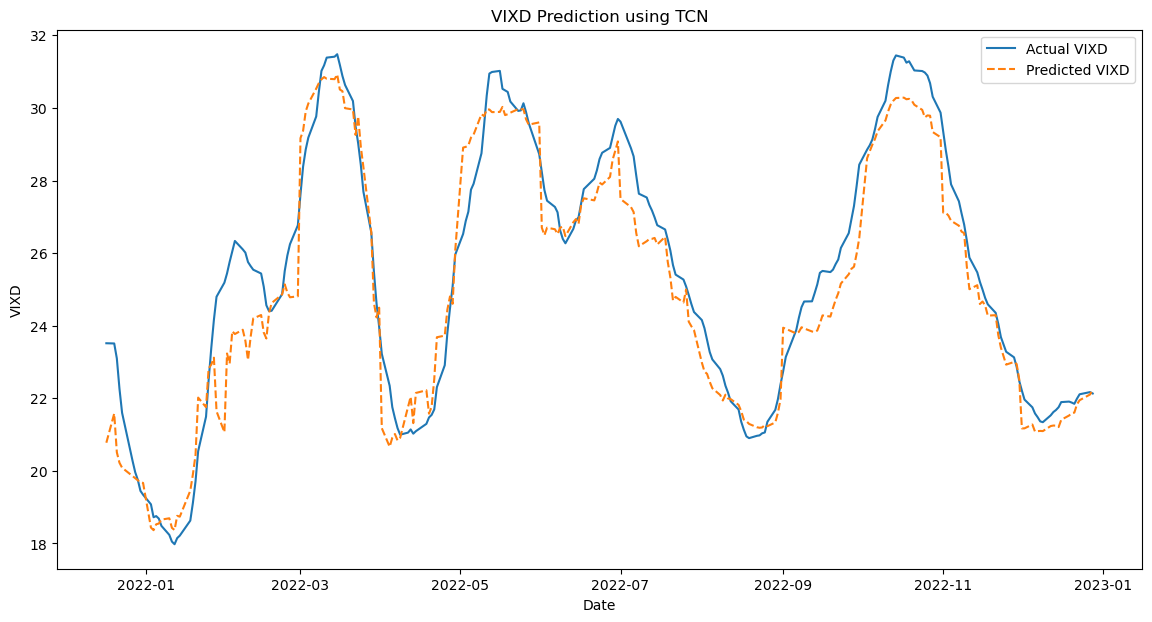

In [2]:
#finbert + textblob
X = data[['Overall Positive Sentiment', 'Overall Neutral Sentiment', 'Overall Negative Sentiment', 
          'Polarity', 'Subjectivity', 
          'Average_SPXD', 'Close_SPXD', 'Close_SPXTRD', 'Average_SPXTRD']]
y = data['Average_VIXD'].shift(-1)

# 删除目标变量中的NaN值，并对齐特征变量的索引
y = y.dropna()
X = X.loc[y.index]

# 删除与目标变量对齐后的最后一行
X = X.iloc[:-1, :]
y = y.iloc[:-1]

# 调整特征权重
weights = {
    'Overall Positive Sentiment': 0.1,
    'Overall Neutral Sentiment': 0.7,
    'Overall Negative Sentiment': 0.1,
    'Polarity': 0.5,
    'Subjectivity': 0.5,
    'Average_SPXD': 0.7,
    'Close_SPXD': 0.7,
    'Close_SPXTRD': 0.7,
    'Average_SPXTRD': 0.7
}
for col, weight in weights.items():
    X[col] = X[col] * weight

# 确保特征和目标变量的索引对齐
X = X.loc[y.index]
data = data.loc[y.index]  # 同步删除 data 中的对应行

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拆分训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 转换为张量并添加一个维度用于Conv1D
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# 定义TCN模型
def build_tcn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=2, padding='causal', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=32, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=64, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
model = build_tcn_model(input_shape)

# 训练模型
history = model.fit(X_train, y_train, epochs=1700, validation_data=(X_val, y_val), batch_size=32)

# 在验证集上评估模型
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Validation Mean Squared Error: {val_mse}')
print(f'Validation Root Mean Squared Error: {val_rmse}')
print(f'Validation Mean Absolute Error: {val_mae}')
print(f'Validation R^2 Score: {val_r2}')

# 在测试集上评估模型
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test Root Mean Squared Error: {test_rmse}')
print(f'Test Mean Absolute Error: {test_mae}')
print(f'Test R^2 Score: {test_r2}')

# 可视化预测结果
predicted_vixd = model.predict(np.expand_dims(X_scaled, axis=2))
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Average_VIXD'], label='Actual VIXD')
plt.plot(data.index[:len(predicted_vixd)], predicted_vixd, label='Predicted VIXD', linestyle='--')
plt.xlabel('Date')
plt.ylabel('VIXD')
plt.title('VIXD Prediction using TCN')
plt.legend()
plt.show()

In [3]:
import scipy.stats as stats

# 计算F统计量和P值的函数
def calculate_f_p_values(y_true, y_pred, X):
    n = len(y_true)  # 样本数
    k = X.shape[1]  # 特征数
    ssr = np.sum((y_pred.flatten() - y_true.mean()) ** 2)  # 回归平方和
    sse = np.sum((y_true - y_pred.flatten()) ** 2)  # 残差平方和
    msr = ssr / k  # 回归均方
    mse = sse / (n - k - 1)  # 残差均方
    f_stat = msr / mse  # F统计量
    p_value = stats.f.sf(f_stat, k, n - k - 1)  # P值
    return f_stat, p_value

# 对验证集进行计算
f_stat_val, p_value_val = calculate_f_p_values(y_val, y_val_pred, X_val)
print(f'Validation F-statistic: {f_stat_val}')
print(f'Validation P-value: {p_value_val}')

# 对测试集进行计算
f_stat_test, p_value_test = calculate_f_p_values(y_test, y_test_pred, X_test)
print(f'Test F-statistic: {f_stat_test}')
print(f'Test P-value: {p_value_test}')



Validation F-statistic: 39.19867388111224
Validation P-value: 1.3103441353734309e-17
Test F-statistic: 55.204968301321486
Test P-value: 2.1160195992009303e-20


Train on 154 samples, validate on 51 samples
Epoch 1/1600
154/154 [==============================] - 4s 23ms/sample - loss: 670.6967 - val_loss: 641.3868
Epoch 2/1600
154/154 [==============================] - 0s 518us/sample - loss: 656.9752 - val_loss: 626.6239
Epoch 3/1600
154/154 [==============================] - 0s 457us/sample - loss: 639.9164 - val_loss: 605.5823
Epoch 4/1600
154/154 [==============================] - 0s 430us/sample - loss: 614.3095 - val_loss: 574.0925
Epoch 5/1600
154/154 [==============================] - 0s 403us/sample - loss: 574.1017 - val_loss: 526.4601
Epoch 6/1600
154/154 [==============================] - 0s 386us/sample - loss: 519.7517 - val_loss: 455.0634
Epoch 7/1600
154/154 [==============================] - 0s 421us/sample - loss: 430.4771 - val_loss: 353.3259
Epoch 8/1600
154/154 [==============================] - 0s 575us/sample - loss: 320.4120 - val_loss: 225.5640
Epoch 9/1600
154/154 [==============================] - 0s 399us/sample - lo

154/154 [==============================] - 0s 506us/sample - loss: 10.8323 - val_loss: 6.8245
Epoch 77/1600
154/154 [==============================] - 0s 579us/sample - loss: 10.6123 - val_loss: 5.6037
Epoch 78/1600
154/154 [==============================] - 0s 499us/sample - loss: 10.5449 - val_loss: 5.5214
Epoch 79/1600
154/154 [==============================] - 0s 532us/sample - loss: 11.2460 - val_loss: 5.8700
Epoch 80/1600
154/154 [==============================] - 0s 489us/sample - loss: 8.8350 - val_loss: 5.2944
Epoch 81/1600
154/154 [==============================] - 0s 527us/sample - loss: 9.5969 - val_loss: 5.1976
Epoch 82/1600
154/154 [==============================] - 0s 461us/sample - loss: 9.9883 - val_loss: 6.3774
Epoch 83/1600
154/154 [==============================] - 0s 533us/sample - loss: 10.0311 - val_loss: 5.7118
Epoch 84/1600
154/154 [==============================] - 0s 446us/sample - loss: 9.7872 - val_loss: 5.0627
Epoch 85/1600
154/154 [=======================

154/154 [==============================] - 0s 473us/sample - loss: 5.2269 - val_loss: 3.1062
Epoch 153/1600
154/154 [==============================] - 0s 476us/sample - loss: 5.9596 - val_loss: 2.9170
Epoch 154/1600
154/154 [==============================] - 0s 517us/sample - loss: 5.8209 - val_loss: 3.6691
Epoch 155/1600
154/154 [==============================] - 0s 446us/sample - loss: 5.5693 - val_loss: 3.2903
Epoch 156/1600
154/154 [==============================] - 0s 402us/sample - loss: 6.3443 - val_loss: 3.1858
Epoch 157/1600
154/154 [==============================] - 0s 384us/sample - loss: 7.2434 - val_loss: 2.6496
Epoch 158/1600
154/154 [==============================] - 0s 373us/sample - loss: 6.0926 - val_loss: 3.5624
Epoch 159/1600
154/154 [==============================] - 0s 370us/sample - loss: 5.9397 - val_loss: 3.1732
Epoch 160/1600
154/154 [==============================] - 0s 363us/sample - loss: 6.1280 - val_loss: 3.5143
Epoch 161/1600
154/154 [===================

Epoch 228/1600
154/154 [==============================] - 0s 394us/sample - loss: 5.2885 - val_loss: 2.0692
Epoch 229/1600
154/154 [==============================] - 0s 360us/sample - loss: 3.3361 - val_loss: 3.4051
Epoch 230/1600
154/154 [==============================] - 0s 351us/sample - loss: 4.5762 - val_loss: 3.2081
Epoch 231/1600
154/154 [==============================] - 0s 642us/sample - loss: 4.0049 - val_loss: 2.0439
Epoch 232/1600
154/154 [==============================] - 0s 357us/sample - loss: 4.9432 - val_loss: 2.9719
Epoch 233/1600
154/154 [==============================] - 0s 417us/sample - loss: 4.9740 - val_loss: 4.8268
Epoch 234/1600
154/154 [==============================] - 0s 348us/sample - loss: 4.8522 - val_loss: 2.0176
Epoch 235/1600
154/154 [==============================] - 0s 338us/sample - loss: 4.3904 - val_loss: 3.1403
Epoch 236/1600
154/154 [==============================] - 0s 387us/sample - loss: 3.8245 - val_loss: 4.0044
Epoch 237/1600
154/154 [====

Epoch 304/1600
154/154 [==============================] - 0s 443us/sample - loss: 3.9374 - val_loss: 3.1279
Epoch 305/1600
154/154 [==============================] - 0s 421us/sample - loss: 3.5508 - val_loss: 3.4163
Epoch 306/1600
154/154 [==============================] - 0s 459us/sample - loss: 3.5285 - val_loss: 3.7503
Epoch 307/1600
154/154 [==============================] - 0s 509us/sample - loss: 3.6030 - val_loss: 2.1663
Epoch 308/1600
154/154 [==============================] - 0s 501us/sample - loss: 3.5910 - val_loss: 3.6701
Epoch 309/1600
154/154 [==============================] - 0s 493us/sample - loss: 3.4288 - val_loss: 4.1153
Epoch 310/1600
154/154 [==============================] - 0s 489us/sample - loss: 3.6408 - val_loss: 2.2058
Epoch 311/1600
154/154 [==============================] - 0s 449us/sample - loss: 3.7612 - val_loss: 2.6927
Epoch 312/1600
154/154 [==============================] - 0s 454us/sample - loss: 3.3543 - val_loss: 3.0561
Epoch 313/1600
154/154 [====

Epoch 380/1600
154/154 [==============================] - 0s 472us/sample - loss: 2.9140 - val_loss: 2.4066
Epoch 381/1600
154/154 [==============================] - 0s 522us/sample - loss: 2.7899 - val_loss: 3.2779
Epoch 382/1600
154/154 [==============================] - 0s 485us/sample - loss: 2.6364 - val_loss: 3.6613
Epoch 383/1600
154/154 [==============================] - 0s 552us/sample - loss: 2.9824 - val_loss: 2.2610
Epoch 384/1600
154/154 [==============================] - 0s 427us/sample - loss: 2.8354 - val_loss: 3.9305
Epoch 385/1600
154/154 [==============================] - 0s 390us/sample - loss: 3.6899 - val_loss: 3.5462
Epoch 386/1600
154/154 [==============================] - 0s 392us/sample - loss: 3.4391 - val_loss: 2.8226
Epoch 387/1600
154/154 [==============================] - 0s 380us/sample - loss: 2.8705 - val_loss: 3.4669
Epoch 388/1600
154/154 [==============================] - 0s 352us/sample - loss: 3.1789 - val_loss: 4.0256
Epoch 389/1600
154/154 [====

Epoch 456/1600
154/154 [==============================] - 0s 394us/sample - loss: 2.4804 - val_loss: 3.6415
Epoch 457/1600
154/154 [==============================] - 0s 316us/sample - loss: 3.1058 - val_loss: 3.2290
Epoch 458/1600
154/154 [==============================] - 0s 321us/sample - loss: 2.9244 - val_loss: 3.5043
Epoch 459/1600
154/154 [==============================] - 0s 321us/sample - loss: 2.4821 - val_loss: 3.0130
Epoch 460/1600
154/154 [==============================] - 0s 367us/sample - loss: 2.9971 - val_loss: 3.3905
Epoch 461/1600
154/154 [==============================] - 0s 405us/sample - loss: 2.7291 - val_loss: 3.3455
Epoch 462/1600
154/154 [==============================] - 0s 357us/sample - loss: 3.0405 - val_loss: 2.5804
Epoch 463/1600
154/154 [==============================] - 0s 393us/sample - loss: 2.8153 - val_loss: 3.2709
Epoch 464/1600
154/154 [==============================] - 0s 370us/sample - loss: 2.6804 - val_loss: 3.0161
Epoch 465/1600
154/154 [====

Epoch 532/1600
154/154 [==============================] - 0s 379us/sample - loss: 2.2882 - val_loss: 3.0223
Epoch 533/1600
154/154 [==============================] - 0s 377us/sample - loss: 2.7602 - val_loss: 2.9372
Epoch 534/1600
154/154 [==============================] - 0s 405us/sample - loss: 3.2517 - val_loss: 3.2261
Epoch 535/1600
154/154 [==============================] - 0s 329us/sample - loss: 2.5723 - val_loss: 2.5845
Epoch 536/1600
154/154 [==============================] - 0s 492us/sample - loss: 2.0942 - val_loss: 2.6854
Epoch 537/1600
154/154 [==============================] - 0s 531us/sample - loss: 2.4828 - val_loss: 2.9762
Epoch 538/1600
154/154 [==============================] - 0s 572us/sample - loss: 2.8673 - val_loss: 3.9692
Epoch 539/1600
154/154 [==============================] - 0s 465us/sample - loss: 2.8269 - val_loss: 1.7770
Epoch 540/1600
154/154 [==============================] - 0s 503us/sample - loss: 2.5868 - val_loss: 3.8582
Epoch 541/1600
154/154 [====

Epoch 608/1600
154/154 [==============================] - 0s 563us/sample - loss: 2.9664 - val_loss: 2.2797
Epoch 609/1600
154/154 [==============================] - 0s 489us/sample - loss: 2.2942 - val_loss: 3.2318
Epoch 610/1600
154/154 [==============================] - 0s 454us/sample - loss: 2.3882 - val_loss: 2.5809
Epoch 611/1600
154/154 [==============================] - 0s 525us/sample - loss: 2.2496 - val_loss: 2.3342
Epoch 612/1600
154/154 [==============================] - 0s 426us/sample - loss: 2.6604 - val_loss: 3.1003
Epoch 613/1600
154/154 [==============================] - 0s 434us/sample - loss: 2.1839 - val_loss: 2.8164
Epoch 614/1600
154/154 [==============================] - 0s 450us/sample - loss: 1.8942 - val_loss: 3.7709
Epoch 615/1600
154/154 [==============================] - 0s 469us/sample - loss: 2.2334 - val_loss: 2.8573
Epoch 616/1600
154/154 [==============================] - 0s 490us/sample - loss: 2.5816 - val_loss: 2.8856
Epoch 617/1600
154/154 [====

Epoch 684/1600
154/154 [==============================] - 0s 476us/sample - loss: 2.5067 - val_loss: 3.6070
Epoch 685/1600
154/154 [==============================] - 0s 639us/sample - loss: 1.8976 - val_loss: 1.9291
Epoch 686/1600
154/154 [==============================] - 0s 781us/sample - loss: 2.3570 - val_loss: 3.1018
Epoch 687/1600
154/154 [==============================] - 0s 585us/sample - loss: 1.7621 - val_loss: 3.6475
Epoch 688/1600
154/154 [==============================] - 0s 608us/sample - loss: 2.1259 - val_loss: 2.1087
Epoch 689/1600
154/154 [==============================] - 0s 610us/sample - loss: 2.1209 - val_loss: 2.8151
Epoch 690/1600
154/154 [==============================] - 0s 760us/sample - loss: 2.0619 - val_loss: 3.1622
Epoch 691/1600
154/154 [==============================] - 0s 778us/sample - loss: 2.8564 - val_loss: 2.1887
Epoch 692/1600
154/154 [==============================] - 0s 726us/sample - loss: 3.0053 - val_loss: 2.4053
Epoch 693/1600
154/154 [====

Epoch 760/1600
154/154 [==============================] - 0s 699us/sample - loss: 2.3082 - val_loss: 3.6083
Epoch 761/1600
154/154 [==============================] - 0s 695us/sample - loss: 2.1354 - val_loss: 1.8825
Epoch 762/1600
154/154 [==============================] - 0s 604us/sample - loss: 1.9535 - val_loss: 2.9999
Epoch 763/1600
154/154 [==============================] - 0s 525us/sample - loss: 2.9160 - val_loss: 3.5407
Epoch 764/1600
154/154 [==============================] - 0s 482us/sample - loss: 2.1118 - val_loss: 2.4512
Epoch 765/1600
154/154 [==============================] - 0s 464us/sample - loss: 2.0753 - val_loss: 1.9621
Epoch 766/1600
154/154 [==============================] - 0s 471us/sample - loss: 1.8212 - val_loss: 3.9469
Epoch 767/1600
154/154 [==============================] - 0s 564us/sample - loss: 2.3634 - val_loss: 2.8286
Epoch 768/1600
154/154 [==============================] - 0s 663us/sample - loss: 2.1327 - val_loss: 2.0228
Epoch 769/1600
154/154 [====

Epoch 836/1600
154/154 [==============================] - 0s 441us/sample - loss: 2.1269 - val_loss: 2.6914
Epoch 837/1600
154/154 [==============================] - 0s 450us/sample - loss: 1.8500 - val_loss: 2.5258
Epoch 838/1600
154/154 [==============================] - 0s 438us/sample - loss: 2.2421 - val_loss: 3.0586
Epoch 839/1600
154/154 [==============================] - 0s 422us/sample - loss: 1.9751 - val_loss: 2.9548
Epoch 840/1600
154/154 [==============================] - 0s 482us/sample - loss: 2.1169 - val_loss: 3.0514
Epoch 841/1600
154/154 [==============================] - 0s 494us/sample - loss: 2.1245 - val_loss: 2.5369
Epoch 842/1600
154/154 [==============================] - 0s 456us/sample - loss: 1.5951 - val_loss: 3.3533
Epoch 843/1600
154/154 [==============================] - 0s 376us/sample - loss: 1.9040 - val_loss: 2.5063
Epoch 844/1600
154/154 [==============================] - 0s 360us/sample - loss: 2.1835 - val_loss: 2.6953
Epoch 845/1600
154/154 [====

Epoch 912/1600
154/154 [==============================] - 0s 545us/sample - loss: 2.5509 - val_loss: 3.2038
Epoch 913/1600
154/154 [==============================] - 0s 593us/sample - loss: 2.4860 - val_loss: 2.5004
Epoch 914/1600
154/154 [==============================] - 0s 541us/sample - loss: 1.8531 - val_loss: 2.5537
Epoch 915/1600
154/154 [==============================] - 0s 768us/sample - loss: 2.2187 - val_loss: 3.0365
Epoch 916/1600
154/154 [==============================] - 0s 526us/sample - loss: 2.5787 - val_loss: 2.1721
Epoch 917/1600
154/154 [==============================] - 0s 546us/sample - loss: 1.6504 - val_loss: 3.0319
Epoch 918/1600
154/154 [==============================] - 0s 498us/sample - loss: 1.8152 - val_loss: 2.2147
Epoch 919/1600
154/154 [==============================] - 0s 457us/sample - loss: 1.9407 - val_loss: 3.6036
Epoch 920/1600
154/154 [==============================] - 0s 475us/sample - loss: 2.4878 - val_loss: 2.7939
Epoch 921/1600
154/154 [====

Epoch 988/1600
154/154 [==============================] - 0s 472us/sample - loss: 1.8328 - val_loss: 2.9592
Epoch 989/1600
154/154 [==============================] - 0s 575us/sample - loss: 1.8164 - val_loss: 2.5311
Epoch 990/1600
154/154 [==============================] - 0s 512us/sample - loss: 1.9355 - val_loss: 3.1862
Epoch 991/1600
154/154 [==============================] - 0s 455us/sample - loss: 2.0157 - val_loss: 2.1406
Epoch 992/1600
154/154 [==============================] - 0s 439us/sample - loss: 1.9380 - val_loss: 2.6369
Epoch 993/1600
154/154 [==============================] - 0s 451us/sample - loss: 2.0045 - val_loss: 2.8780
Epoch 994/1600
154/154 [==============================] - 0s 416us/sample - loss: 1.8071 - val_loss: 2.3133
Epoch 995/1600
154/154 [==============================] - 0s 386us/sample - loss: 1.8495 - val_loss: 2.6808
Epoch 996/1600
154/154 [==============================] - 0s 406us/sample - loss: 2.1744 - val_loss: 2.3516
Epoch 997/1600
154/154 [====

154/154 [==============================] - 0s 408us/sample - loss: 2.0368 - val_loss: 2.4745
Epoch 1139/1600
154/154 [==============================] - 0s 362us/sample - loss: 1.7539 - val_loss: 2.7312
Epoch 1140/1600
154/154 [==============================] - 0s 439us/sample - loss: 1.7095 - val_loss: 2.5235
Epoch 1141/1600
154/154 [==============================] - 0s 378us/sample - loss: 1.8667 - val_loss: 2.4002
Epoch 1142/1600
154/154 [==============================] - 0s 346us/sample - loss: 1.9657 - val_loss: 2.9939
Epoch 1143/1600
154/154 [==============================] - 0s 637us/sample - loss: 1.6887 - val_loss: 1.9941
Epoch 1144/1600
154/154 [==============================] - 0s 524us/sample - loss: 1.7969 - val_loss: 2.4591
Epoch 1145/1600
154/154 [==============================] - 0s 951us/sample - loss: 1.8761 - val_loss: 2.3083
Epoch 1146/1600
154/154 [==============================] - 0s 691us/sample - loss: 1.7836 - val_loss: 2.6451
Epoch 1147/1600
154/154 [==========

154/154 [==============================] - 0s 1ms/sample - loss: 1.4208 - val_loss: 2.4397
Epoch 1289/1600
154/154 [==============================] - 0s 727us/sample - loss: 1.4099 - val_loss: 2.5144
Epoch 1290/1600
154/154 [==============================] - 0s 759us/sample - loss: 1.6675 - val_loss: 2.7770
Epoch 1291/1600
154/154 [==============================] - 0s 676us/sample - loss: 1.5424 - val_loss: 2.4585
Epoch 1292/1600
154/154 [==============================] - 0s 732us/sample - loss: 1.7302 - val_loss: 2.8377
Epoch 1293/1600
154/154 [==============================] - 0s 631us/sample - loss: 1.5802 - val_loss: 2.9528
Epoch 1294/1600
154/154 [==============================] - 0s 634us/sample - loss: 1.3995 - val_loss: 2.4491
Epoch 1295/1600
154/154 [==============================] - 0s 697us/sample - loss: 1.5534 - val_loss: 2.2770
Epoch 1296/1600
154/154 [==============================] - 0s 636us/sample - loss: 1.4162 - val_loss: 2.3047
Epoch 1297/1600
154/154 [============

154/154 [==============================] - 0s 1ms/sample - loss: 1.4880 - val_loss: 1.9221
Epoch 1439/1600
154/154 [==============================] - 0s 921us/sample - loss: 1.8608 - val_loss: 3.3859
Epoch 1440/1600
154/154 [==============================] - 0s 799us/sample - loss: 1.2721 - val_loss: 1.7097
Epoch 1441/1600
154/154 [==============================] - 0s 885us/sample - loss: 1.9949 - val_loss: 2.7389
Epoch 1442/1600
154/154 [==============================] - 0s 923us/sample - loss: 1.3415 - val_loss: 2.5470
Epoch 1443/1600
154/154 [==============================] - 0s 823us/sample - loss: 1.3920 - val_loss: 2.3955
Epoch 1444/1600
154/154 [==============================] - 0s 870us/sample - loss: 1.3436 - val_loss: 2.7254
Epoch 1445/1600
154/154 [==============================] - 0s 779us/sample - loss: 1.2058 - val_loss: 2.4610
Epoch 1446/1600
154/154 [==============================] - 0s 813us/sample - loss: 1.4049 - val_loss: 2.4841
Epoch 1447/1600
154/154 [============

154/154 [==============================] - 0s 698us/sample - loss: 1.5119 - val_loss: 2.3344
Epoch 1589/1600
154/154 [==============================] - 0s 467us/sample - loss: 1.4664 - val_loss: 2.2233
Epoch 1590/1600
154/154 [==============================] - 0s 513us/sample - loss: 1.1230 - val_loss: 2.4221
Epoch 1591/1600
154/154 [==============================] - 0s 630us/sample - loss: 1.2560 - val_loss: 2.2363
Epoch 1592/1600
154/154 [==============================] - 0s 418us/sample - loss: 1.4458 - val_loss: 2.5488
Epoch 1593/1600
154/154 [==============================] - 0s 454us/sample - loss: 1.6575 - val_loss: 2.2437
Epoch 1594/1600
154/154 [==============================] - 0s 585us/sample - loss: 1.3640 - val_loss: 2.6208
Epoch 1595/1600
154/154 [==============================] - 0s 772us/sample - loss: 1.2328 - val_loss: 2.0729
Epoch 1596/1600
154/154 [==============================] - 0s 603us/sample - loss: 1.0710 - val_loss: 1.9418
Epoch 1597/1600
154/154 [==========

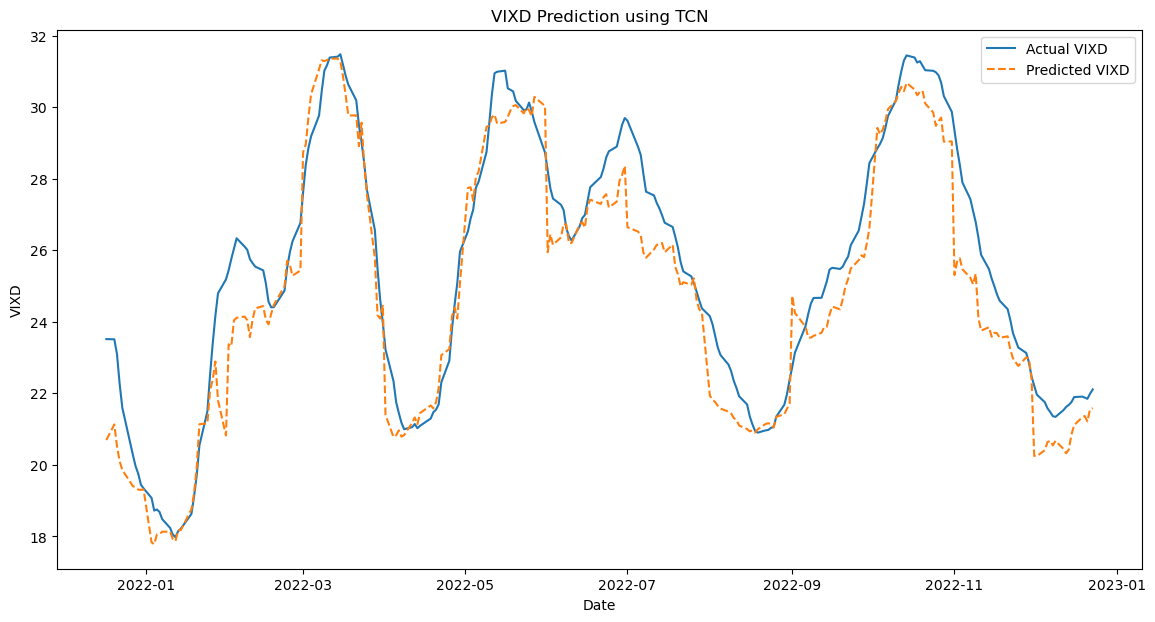

In [4]:
#finbert vader
X = data[['Overall Positive Sentiment', 'Overall Neutral Sentiment', 'Overall Negative Sentiment', 
          'Positive', 'Neutral', 'Negative', 
          'Average_SPXD', 'Close_SPXD', 'Close_SPXTRD', 'Average_SPXTRD']]
y = data['Average_VIXD'].shift(-1)

# 删除目标变量中的NaN值，并对齐特征变量的索引
y = y.dropna()
X = X.loc[y.index]

# 删除与目标变量对齐后的最后一行
X = X.iloc[:-1, :]
y = y.iloc[:-1]

# 调整特征权重
weights = {
    'Overall Positive Sentiment': 0.1,
    'Overall Neutral Sentiment': 0.7,
    'Overall Negative Sentiment': 0.1,
    'Positive': 0.5,
    'Neutral': 0.5,
    'Negative': 0.5,
    'Average_SPXD': 0.7,
    'Close_SPXD': 0.7,
    'Close_SPXTRD': 0.7,
    'Average_SPXTRD': 0.7
}
for col, weight in weights.items():
    X[col] = X[col] * weight

# 确保特征和目标变量的索引对齐
X = X.loc[y.index]
data = data.loc[y.index]  # 同步删除 data 中的对应行

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拆分训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 转换为张量并添加一个维度用于Conv1D
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# 定义TCN模型
def build_tcn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=2, padding='causal', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=32, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=64, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
model = build_tcn_model(input_shape)

# 训练模型
history = model.fit(X_train, y_train, epochs=1600, validation_data=(X_val, y_val), batch_size=32)

# 在验证集上评估模型
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Validation Mean Squared Error: {val_mse}')
print(f'Validation Root Mean Squared Error: {val_rmse}')
print(f'Validation Mean Absolute Error: {val_mae}')
print(f'Validation R^2 Score: {val_r2}')

# 在测试集上评估模型
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test Root Mean Squared Error: {test_rmse}')
print(f'Test Mean Absolute Error: {test_mae}')
print(f'Test R^2 Score: {test_r2}')
# 可视化预测结果
predicted_vixd = model.predict(np.expand_dims(X_scaled, axis=2))
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Average_VIXD'], label='Actual VIXD')
plt.plot(data.index[:len(predicted_vixd)], predicted_vixd, label='Predicted VIXD', linestyle='--')
plt.xlabel('Date')
plt.ylabel('VIXD')
plt.title('VIXD Prediction using TCN')
plt.legend()
plt.show()

In [5]:
import scipy.stats as stats

# 计算F统计量和P值的函数
def calculate_f_p_values(y_true, y_pred, X):
    n = len(y_true)  # 样本数
    k = X.shape[1]  # 特征数
    ssr = np.sum((y_pred.flatten() - y_true.mean()) ** 2)  # 回归平方和
    sse = np.sum((y_true - y_pred.flatten()) ** 2)  # 残差平方和
    msr = ssr / k  # 回归均方
    mse = sse / (n - k - 1)  # 残差均方
    f_stat = msr / mse  # F统计量
    p_value = stats.f.sf(f_stat, k, n - k - 1)  # P值
    return f_stat, p_value

# 对验证集进行计算
f_stat_val, p_value_val = calculate_f_p_values(y_val, y_val_pred, X_val)
print(f'Validation F-statistic: {f_stat_val}')
print(f'Validation P-value: {p_value_val}')

# 对测试集进行计算
f_stat_test, p_value_test = calculate_f_p_values(y_test, y_test_pred, X_test)
print(f'Test F-statistic: {f_stat_test}')
print(f'Test P-value: {p_value_test}')



Validation F-statistic: 24.582712441257733
Validation P-value: 4.979158246015737e-14
Test F-statistic: 55.07754302791216
Test P-value: 1.509381064296225e-20


Train on 153 samples, validate on 51 samples
Epoch 1/1700
153/153 [==============================] - 2s 14ms/sample - loss: 659.1649 - val_loss: 620.2107
Epoch 2/1700
153/153 [==============================] - 0s 632us/sample - loss: 643.5730 - val_loss: 604.0792
Epoch 3/1700
153/153 [==============================] - 0s 380us/sample - loss: 623.0489 - val_loss: 580.1587
Epoch 4/1700
153/153 [==============================] - 0s 439us/sample - loss: 591.4467 - val_loss: 543.9642
Epoch 5/1700
153/153 [==============================] - 0s 423us/sample - loss: 546.7385 - val_loss: 490.2045
Epoch 6/1700
153/153 [==============================] - 0s 379us/sample - loss: 479.2929 - val_loss: 413.5172
Epoch 7/1700
153/153 [==============================] - 0s 382us/sample - loss: 386.9313 - val_loss: 310.2616
Epoch 8/1700
153/153 [==============================] - 0s 395us/sample - loss: 274.5285 - val_loss: 187.0664
Epoch 9/1700
153/153 [==============================] - 0s 390us/sample - lo

Epoch 151/1700
153/153 [==============================] - 0s 247us/sample - loss: 6.2084 - val_loss: 5.1165
Epoch 152/1700
153/153 [==============================] - 0s 259us/sample - loss: 7.2526 - val_loss: 5.0666
Epoch 153/1700
153/153 [==============================] - 0s 264us/sample - loss: 6.0295 - val_loss: 5.0386
Epoch 154/1700
153/153 [==============================] - 0s 262us/sample - loss: 7.5597 - val_loss: 4.5990
Epoch 155/1700
153/153 [==============================] - 0s 266us/sample - loss: 7.6015 - val_loss: 5.4385
Epoch 156/1700
153/153 [==============================] - 0s 268us/sample - loss: 6.6263 - val_loss: 5.9903
Epoch 157/1700
153/153 [==============================] - 0s 268us/sample - loss: 7.1617 - val_loss: 5.0510
Epoch 158/1700
153/153 [==============================] - 0s 262us/sample - loss: 6.9797 - val_loss: 4.7995
Epoch 159/1700
153/153 [==============================] - 0s 255us/sample - loss: 7.4175 - val_loss: 4.9548
Epoch 160/1700
153/153 [====

Epoch 227/1700
153/153 [==============================] - 0s 241us/sample - loss: 6.1496 - val_loss: 3.6925
Epoch 228/1700
153/153 [==============================] - 0s 281us/sample - loss: 6.2104 - val_loss: 3.6475
Epoch 229/1700
153/153 [==============================] - 0s 274us/sample - loss: 7.1358 - val_loss: 3.7587
Epoch 230/1700
153/153 [==============================] - 0s 284us/sample - loss: 6.1414 - val_loss: 4.3578
Epoch 231/1700
153/153 [==============================] - 0s 280us/sample - loss: 6.2514 - val_loss: 3.9198
Epoch 232/1700
153/153 [==============================] - 0s 236us/sample - loss: 5.7444 - val_loss: 5.1541
Epoch 233/1700
153/153 [==============================] - 0s 227us/sample - loss: 5.9954 - val_loss: 3.8756
Epoch 234/1700
153/153 [==============================] - 0s 229us/sample - loss: 5.7158 - val_loss: 3.8593
Epoch 235/1700
153/153 [==============================] - 0s 235us/sample - loss: 5.0443 - val_loss: 5.3644
Epoch 236/1700
153/153 [====

Epoch 303/1700
153/153 [==============================] - 0s 227us/sample - loss: 4.6074 - val_loss: 4.7589
Epoch 304/1700
153/153 [==============================] - 0s 234us/sample - loss: 4.5512 - val_loss: 3.7011
Epoch 305/1700
153/153 [==============================] - 0s 222us/sample - loss: 5.3255 - val_loss: 3.1977
Epoch 306/1700
153/153 [==============================] - 0s 222us/sample - loss: 4.9325 - val_loss: 4.0953
Epoch 307/1700
153/153 [==============================] - 0s 388us/sample - loss: 5.6152 - val_loss: 4.4254
Epoch 308/1700
153/153 [==============================] - 0s 223us/sample - loss: 5.3247 - val_loss: 3.4168
Epoch 309/1700
153/153 [==============================] - 0s 229us/sample - loss: 5.2685 - val_loss: 3.6073
Epoch 310/1700
153/153 [==============================] - 0s 273us/sample - loss: 5.1687 - val_loss: 3.4393
Epoch 311/1700
153/153 [==============================] - 0s 300us/sample - loss: 4.7675 - val_loss: 3.4649
Epoch 312/1700
153/153 [====

Epoch 379/1700
153/153 [==============================] - 0s 226us/sample - loss: 4.7156 - val_loss: 4.1246
Epoch 380/1700
153/153 [==============================] - 0s 227us/sample - loss: 4.2121 - val_loss: 3.4178
Epoch 381/1700
153/153 [==============================] - 0s 245us/sample - loss: 3.8285 - val_loss: 2.9499
Epoch 382/1700
153/153 [==============================] - 0s 220us/sample - loss: 4.6173 - val_loss: 3.2839
Epoch 383/1700
153/153 [==============================] - 0s 225us/sample - loss: 4.7235 - val_loss: 3.9327
Epoch 384/1700
153/153 [==============================] - 0s 231us/sample - loss: 4.3650 - val_loss: 2.9912
Epoch 385/1700
153/153 [==============================] - 0s 235us/sample - loss: 3.6344 - val_loss: 2.7935
Epoch 386/1700
153/153 [==============================] - 0s 215us/sample - loss: 3.9633 - val_loss: 3.9886
Epoch 387/1700
153/153 [==============================] - 0s 236us/sample - loss: 4.6189 - val_loss: 2.7719
Epoch 388/1700
153/153 [====

Epoch 455/1700
153/153 [==============================] - 0s 267us/sample - loss: 4.0012 - val_loss: 2.8934
Epoch 456/1700
153/153 [==============================] - 0s 266us/sample - loss: 3.7610 - val_loss: 2.7847
Epoch 457/1700
153/153 [==============================] - 0s 249us/sample - loss: 3.9006 - val_loss: 2.3433
Epoch 458/1700
153/153 [==============================] - 0s 249us/sample - loss: 3.7595 - val_loss: 2.9604
Epoch 459/1700
153/153 [==============================] - 0s 247us/sample - loss: 3.6041 - val_loss: 2.9655
Epoch 460/1700
153/153 [==============================] - 0s 256us/sample - loss: 4.0065 - val_loss: 1.9329
Epoch 461/1700
153/153 [==============================] - 0s 221us/sample - loss: 5.3962 - val_loss: 5.9239
Epoch 462/1700
153/153 [==============================] - 0s 267us/sample - loss: 5.5434 - val_loss: 2.5037
Epoch 463/1700
153/153 [==============================] - 0s 294us/sample - loss: 3.9065 - val_loss: 2.2269
Epoch 464/1700
153/153 [====

Epoch 531/1700
153/153 [==============================] - 0s 380us/sample - loss: 3.4613 - val_loss: 2.8894
Epoch 532/1700
153/153 [==============================] - 0s 266us/sample - loss: 3.4357 - val_loss: 2.5165
Epoch 533/1700
153/153 [==============================] - 0s 303us/sample - loss: 3.8135 - val_loss: 2.6386
Epoch 534/1700
153/153 [==============================] - 0s 252us/sample - loss: 4.3471 - val_loss: 3.2383
Epoch 535/1700
153/153 [==============================] - 0s 333us/sample - loss: 3.9556 - val_loss: 1.9958
Epoch 536/1700
153/153 [==============================] - 0s 296us/sample - loss: 3.5871 - val_loss: 3.6412
Epoch 537/1700
153/153 [==============================] - 0s 305us/sample - loss: 3.8504 - val_loss: 1.7037
Epoch 538/1700
153/153 [==============================] - 0s 243us/sample - loss: 3.5503 - val_loss: 2.7725
Epoch 539/1700
153/153 [==============================] - 0s 263us/sample - loss: 3.1731 - val_loss: 3.2038
Epoch 540/1700
153/153 [====

Epoch 607/1700
153/153 [==============================] - 0s 287us/sample - loss: 3.7937 - val_loss: 2.0887
Epoch 608/1700
153/153 [==============================] - 0s 293us/sample - loss: 3.1114 - val_loss: 2.0843
Epoch 609/1700
153/153 [==============================] - 0s 300us/sample - loss: 3.5654 - val_loss: 3.2853
Epoch 610/1700
153/153 [==============================] - 0s 307us/sample - loss: 3.3112 - val_loss: 2.3064
Epoch 611/1700
153/153 [==============================] - 0s 370us/sample - loss: 3.3470 - val_loss: 3.1612
Epoch 612/1700
153/153 [==============================] - 0s 293us/sample - loss: 2.7536 - val_loss: 2.8806
Epoch 613/1700
153/153 [==============================] - 0s 311us/sample - loss: 3.2536 - val_loss: 1.6271
Epoch 614/1700
153/153 [==============================] - 0s 319us/sample - loss: 3.5812 - val_loss: 3.4578
Epoch 615/1700
153/153 [==============================] - 0s 335us/sample - loss: 3.9794 - val_loss: 2.8635
Epoch 616/1700
153/153 [====

Epoch 683/1700
153/153 [==============================] - 0s 438us/sample - loss: 3.3108 - val_loss: 2.2614
Epoch 684/1700
153/153 [==============================] - 0s 516us/sample - loss: 2.7908 - val_loss: 2.4541
Epoch 685/1700
153/153 [==============================] - 0s 310us/sample - loss: 3.2839 - val_loss: 2.3636
Epoch 686/1700
153/153 [==============================] - 0s 1ms/sample - loss: 2.7055 - val_loss: 2.1764
Epoch 687/1700
153/153 [==============================] - 0s 752us/sample - loss: 3.2476 - val_loss: 2.1681
Epoch 688/1700
153/153 [==============================] - 0s 560us/sample - loss: 2.9574 - val_loss: 1.7830
Epoch 689/1700
153/153 [==============================] - 0s 638us/sample - loss: 3.2862 - val_loss: 2.7290
Epoch 690/1700
153/153 [==============================] - 0s 553us/sample - loss: 3.3783 - val_loss: 1.9780
Epoch 691/1700
153/153 [==============================] - 0s 509us/sample - loss: 3.3231 - val_loss: 1.9019
Epoch 692/1700
153/153 [======

Epoch 759/1700
153/153 [==============================] - 0s 828us/sample - loss: 3.3139 - val_loss: 2.9899
Epoch 760/1700
153/153 [==============================] - 0s 407us/sample - loss: 3.5105 - val_loss: 2.5571
Epoch 761/1700
153/153 [==============================] - 0s 363us/sample - loss: 3.2144 - val_loss: 2.1717
Epoch 762/1700
153/153 [==============================] - 0s 311us/sample - loss: 2.4868 - val_loss: 2.2714
Epoch 763/1700
153/153 [==============================] - 0s 368us/sample - loss: 3.1179 - val_loss: 2.3284
Epoch 764/1700
153/153 [==============================] - 0s 431us/sample - loss: 2.9454 - val_loss: 2.8436
Epoch 765/1700
153/153 [==============================] - 0s 429us/sample - loss: 3.1291 - val_loss: 1.8028
Epoch 766/1700
153/153 [==============================] - 0s 339us/sample - loss: 2.8699 - val_loss: 2.2979
Epoch 767/1700
153/153 [==============================] - 0s 351us/sample - loss: 3.1010 - val_loss: 3.7728
Epoch 768/1700
153/153 [====

Epoch 835/1700
153/153 [==============================] - 0s 359us/sample - loss: 2.5171 - val_loss: 1.3615
Epoch 836/1700
153/153 [==============================] - 0s 314us/sample - loss: 2.4655 - val_loss: 2.7750
Epoch 837/1700
153/153 [==============================] - 0s 278us/sample - loss: 3.4163 - val_loss: 2.0033
Epoch 838/1700
153/153 [==============================] - 0s 279us/sample - loss: 2.7614 - val_loss: 1.3213
Epoch 839/1700
153/153 [==============================] - 0s 263us/sample - loss: 2.8403 - val_loss: 2.6012
Epoch 840/1700
153/153 [==============================] - 0s 328us/sample - loss: 3.2444 - val_loss: 1.6190
Epoch 841/1700
153/153 [==============================] - 0s 354us/sample - loss: 2.4975 - val_loss: 1.6492
Epoch 842/1700
153/153 [==============================] - 0s 285us/sample - loss: 2.3732 - val_loss: 2.9581
Epoch 843/1700
153/153 [==============================] - 0s 281us/sample - loss: 2.7355 - val_loss: 1.3424
Epoch 844/1700
153/153 [====

Epoch 911/1700
153/153 [==============================] - 0s 324us/sample - loss: 2.0968 - val_loss: 2.4694
Epoch 912/1700
153/153 [==============================] - 0s 396us/sample - loss: 2.4928 - val_loss: 1.0696
Epoch 913/1700
153/153 [==============================] - 0s 303us/sample - loss: 2.2464 - val_loss: 2.6940
Epoch 914/1700
153/153 [==============================] - 0s 298us/sample - loss: 2.9397 - val_loss: 1.4356
Epoch 915/1700
153/153 [==============================] - 0s 259us/sample - loss: 2.5530 - val_loss: 1.9015
Epoch 916/1700
153/153 [==============================] - 0s 291us/sample - loss: 2.0890 - val_loss: 2.2474
Epoch 917/1700
153/153 [==============================] - 0s 339us/sample - loss: 2.2291 - val_loss: 1.4312
Epoch 918/1700
153/153 [==============================] - 0s 342us/sample - loss: 2.6829 - val_loss: 1.5814
Epoch 919/1700
153/153 [==============================] - 0s 425us/sample - loss: 2.6961 - val_loss: 2.1726
Epoch 920/1700
153/153 [====

Epoch 987/1700
153/153 [==============================] - 0s 306us/sample - loss: 2.3404 - val_loss: 1.5773
Epoch 988/1700
153/153 [==============================] - 0s 345us/sample - loss: 2.2867 - val_loss: 2.2401
Epoch 989/1700
153/153 [==============================] - 0s 330us/sample - loss: 2.3351 - val_loss: 1.2093
Epoch 990/1700
153/153 [==============================] - 0s 430us/sample - loss: 2.7057 - val_loss: 1.7603
Epoch 991/1700
153/153 [==============================] - 0s 364us/sample - loss: 2.3289 - val_loss: 1.2058
Epoch 992/1700
153/153 [==============================] - 0s 347us/sample - loss: 2.5176 - val_loss: 1.9634
Epoch 993/1700
153/153 [==============================] - 0s 279us/sample - loss: 2.3367 - val_loss: 1.4459
Epoch 994/1700
153/153 [==============================] - 0s 306us/sample - loss: 2.4684 - val_loss: 1.3661
Epoch 995/1700
153/153 [==============================] - 0s 287us/sample - loss: 1.9031 - val_loss: 2.0089
Epoch 996/1700
153/153 [====

153/153 [==============================] - 0s 398us/sample - loss: 2.2260 - val_loss: 1.2495
Epoch 1138/1700
153/153 [==============================] - 0s 437us/sample - loss: 1.7580 - val_loss: 1.0430
Epoch 1139/1700
153/153 [==============================] - 0s 416us/sample - loss: 2.1343 - val_loss: 1.8302
Epoch 1140/1700
153/153 [==============================] - 0s 501us/sample - loss: 2.2036 - val_loss: 1.4206
Epoch 1141/1700
153/153 [==============================] - 0s 397us/sample - loss: 2.2697 - val_loss: 1.5503
Epoch 1142/1700
153/153 [==============================] - 0s 466us/sample - loss: 2.4133 - val_loss: 1.3530
Epoch 1143/1700
153/153 [==============================] - 0s 394us/sample - loss: 2.4830 - val_loss: 1.7666
Epoch 1144/1700
153/153 [==============================] - 0s 338us/sample - loss: 2.0475 - val_loss: 1.4378
Epoch 1145/1700
153/153 [==============================] - 0s 457us/sample - loss: 2.1945 - val_loss: 1.6279
Epoch 1146/1700
153/153 [==========

153/153 [==============================] - 0s 596us/sample - loss: 2.1882 - val_loss: 1.3445
Epoch 1288/1700
153/153 [==============================] - 0s 1ms/sample - loss: 2.0675 - val_loss: 1.7654
Epoch 1289/1700
153/153 [==============================] - 0s 730us/sample - loss: 1.8576 - val_loss: 1.1043
Epoch 1290/1700
153/153 [==============================] - 0s 732us/sample - loss: 1.8283 - val_loss: 0.9015
Epoch 1291/1700
153/153 [==============================] - 0s 1ms/sample - loss: 2.3638 - val_loss: 2.2458
Epoch 1292/1700
153/153 [==============================] - 0s 825us/sample - loss: 2.0291 - val_loss: 1.4736
Epoch 1293/1700
153/153 [==============================] - 0s 649us/sample - loss: 2.5627 - val_loss: 1.1019
Epoch 1294/1700
153/153 [==============================] - 0s 1ms/sample - loss: 1.9056 - val_loss: 1.9133
Epoch 1295/1700
153/153 [==============================] - 0s 967us/sample - loss: 1.8980 - val_loss: 1.1571
Epoch 1296/1700
153/153 [================

153/153 [==============================] - 0s 610us/sample - loss: 1.5456 - val_loss: 0.9379
Epoch 1438/1700
153/153 [==============================] - 0s 441us/sample - loss: 1.6446 - val_loss: 1.4679
Epoch 1439/1700
153/153 [==============================] - 0s 501us/sample - loss: 1.4739 - val_loss: 1.2072
Epoch 1440/1700
153/153 [==============================] - 0s 586us/sample - loss: 2.0239 - val_loss: 1.1960
Epoch 1441/1700
153/153 [==============================] - 0s 450us/sample - loss: 1.8614 - val_loss: 1.1703
Epoch 1442/1700
153/153 [==============================] - 0s 444us/sample - loss: 1.9958 - val_loss: 1.2744
Epoch 1443/1700
153/153 [==============================] - 0s 544us/sample - loss: 1.7019 - val_loss: 0.6905
Epoch 1444/1700
153/153 [==============================] - 0s 445us/sample - loss: 1.9424 - val_loss: 1.3872
Epoch 1445/1700
153/153 [==============================] - 0s 445us/sample - loss: 1.8014 - val_loss: 2.3886
Epoch 1446/1700
153/153 [==========

153/153 [==============================] - 0s 463us/sample - loss: 1.9026 - val_loss: 1.5689
Epoch 1588/1700
153/153 [==============================] - 0s 341us/sample - loss: 1.2548 - val_loss: 0.6262
Epoch 1589/1700
153/153 [==============================] - 0s 413us/sample - loss: 2.2536 - val_loss: 1.5408
Epoch 1590/1700
153/153 [==============================] - 0s 391us/sample - loss: 1.7311 - val_loss: 1.5821
Epoch 1591/1700
153/153 [==============================] - 0s 359us/sample - loss: 1.5550 - val_loss: 0.6153
Epoch 1592/1700
153/153 [==============================] - 0s 343us/sample - loss: 1.8929 - val_loss: 1.7242
Epoch 1593/1700
153/153 [==============================] - 0s 390us/sample - loss: 1.8542 - val_loss: 1.6482
Epoch 1594/1700
153/153 [==============================] - 0s 461us/sample - loss: 1.8386 - val_loss: 0.8503
Epoch 1595/1700
153/153 [==============================] - 0s 493us/sample - loss: 1.9479 - val_loss: 2.4309
Epoch 1596/1700
153/153 [==========

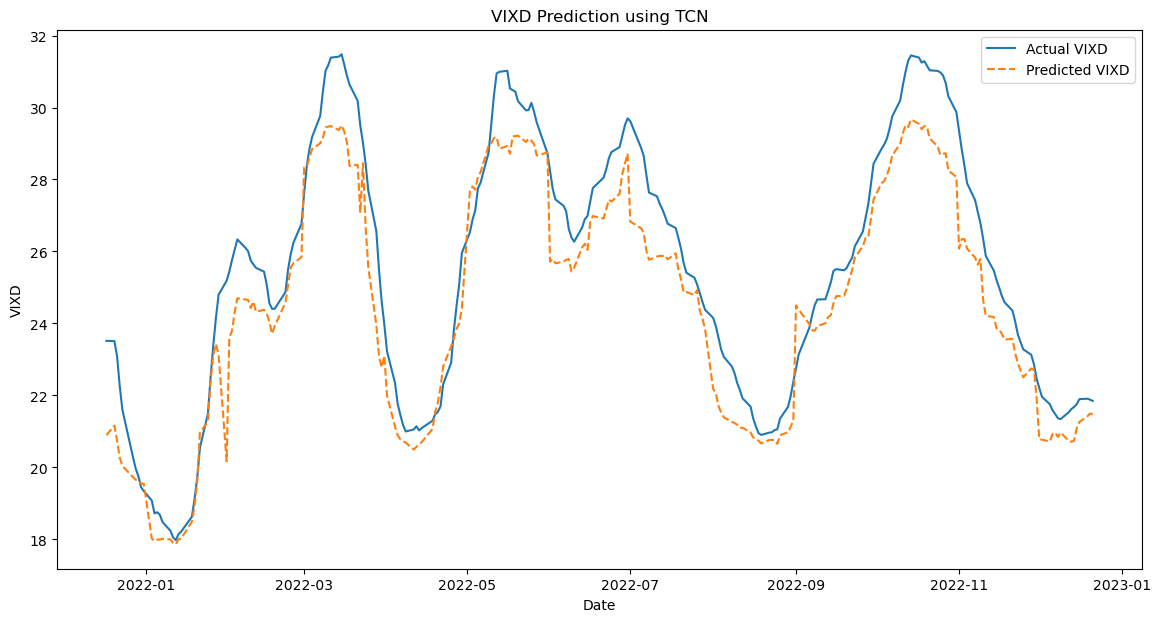

In [6]:
#textblob vader
X = data[[
          'Polarity', 'Subjectivity', 
          'Positive', 'Neutral', 'Negative', 
          'Average_SPXD', 'Close_SPXD', 'Close_SPXTRD', 'Average_SPXTRD']]
y = data['Average_VIXD'].shift(-1)

# 删除目标变量中的NaN值，并对齐特征变量的索引
y = y.dropna()
X = X.loc[y.index]

# 删除与目标变量对齐后的最后一行
X = X.iloc[:-1, :]
y = y.iloc[:-1]

# 调整特征权重
weights = {
    'Polarity': 0.5,
    'Subjectivity': 0.5,
    'Positive': 0.5,
    'Neutral': 0.5,
    'Negative': 0.5,
    'Average_SPXD': 0.7,
    'Close_SPXD': 0.7,
    'Close_SPXTRD': 0.7,
    'Average_SPXTRD': 0.7
}
for col, weight in weights.items():
    X[col] = X[col] * weight

# 确保特征和目标变量的索引对齐
X = X.loc[y.index]
data = data.loc[y.index]  # 同步删除 data 中的对应行

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拆分训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 转换为张量并添加一个维度用于Conv1D
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# 定义TCN模型
def build_tcn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=2, padding='causal', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=32, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=64, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
model = build_tcn_model(input_shape)

# 训练模型
history = model.fit(X_train, y_train, epochs=1700, validation_data=(X_val, y_val), batch_size=32)

# 在验证集上评估模型
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Validation Mean Squared Error: {val_mse}')
print(f'Validation Root Mean Squared Error: {val_rmse}')
print(f'Validation Mean Absolute Error: {val_mae}')
print(f'Validation R^2 Score: {val_r2}')

# 在测试集上评估模型
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test Root Mean Squared Error: {test_rmse}')
print(f'Test Mean Absolute Error: {test_mae}')
print(f'Test R^2 Score: {test_r2}')
# 可视化预测结果
predicted_vixd = model.predict(np.expand_dims(X_scaled, axis=2))
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Average_VIXD'], label='Actual VIXD')
plt.plot(data.index[:len(predicted_vixd)], predicted_vixd, label='Predicted VIXD', linestyle='--')
plt.xlabel('Date')
plt.ylabel('VIXD')
plt.title('VIXD Prediction using TCN')
plt.legend()
plt.show()

In [7]:
import scipy.stats as stats

# 计算F统计量和P值的函数
def calculate_f_p_values(y_true, y_pred, X):
    n = len(y_true)  # 样本数
    k = X.shape[1]  # 特征数
    ssr = np.sum((y_pred.flatten() - y_true.mean()) ** 2)  # 回归平方和
    sse = np.sum((y_true - y_pred.flatten()) ** 2)  # 残差平方和
    msr = ssr / k  # 回归均方
    mse = sse / (n - k - 1)  # 残差均方
    f_stat = msr / mse  # F统计量
    p_value = stats.f.sf(f_stat, k, n - k - 1)  # P值
    return f_stat, p_value

# 对验证集进行计算
f_stat_val, p_value_val = calculate_f_p_values(y_val, y_val_pred, X_val)
print(f'Validation F-statistic: {f_stat_val}')
print(f'Validation P-value: {p_value_val}')

# 对测试集进行计算
f_stat_test, p_value_test = calculate_f_p_values(y_test, y_test_pred, X_test)
print(f'Test F-statistic: {f_stat_test}')
print(f'Test P-value: {p_value_test}')



Validation F-statistic: 45.80168146610515
Validation P-value: 1.4228584597720751e-18
Test F-statistic: 21.977821619551207
Test P-value: 5.286624988696167e-13


In [8]:
results_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Validation': [val_mse, val_rmse, val_mae, val_r2],
    'Test': [test_mse, test_rmse, test_mae, test_r2]
})

# 计算四分位数
quartiles = results_df.describe(percentiles=[0.25, 0.5, 0.75])

print("Quartiles for validation and test metrics:")
print(quartiles)

Quartiles for validation and test metrics:
       Validation      Test
count    4.000000  4.000000
mean     1.127638  1.279502
std      0.217738  0.455040
min      0.914259  0.790957
25%      0.981210  1.020779
50%      1.094789  1.231386
75%      1.241216  1.490109
max      1.406715  1.864279


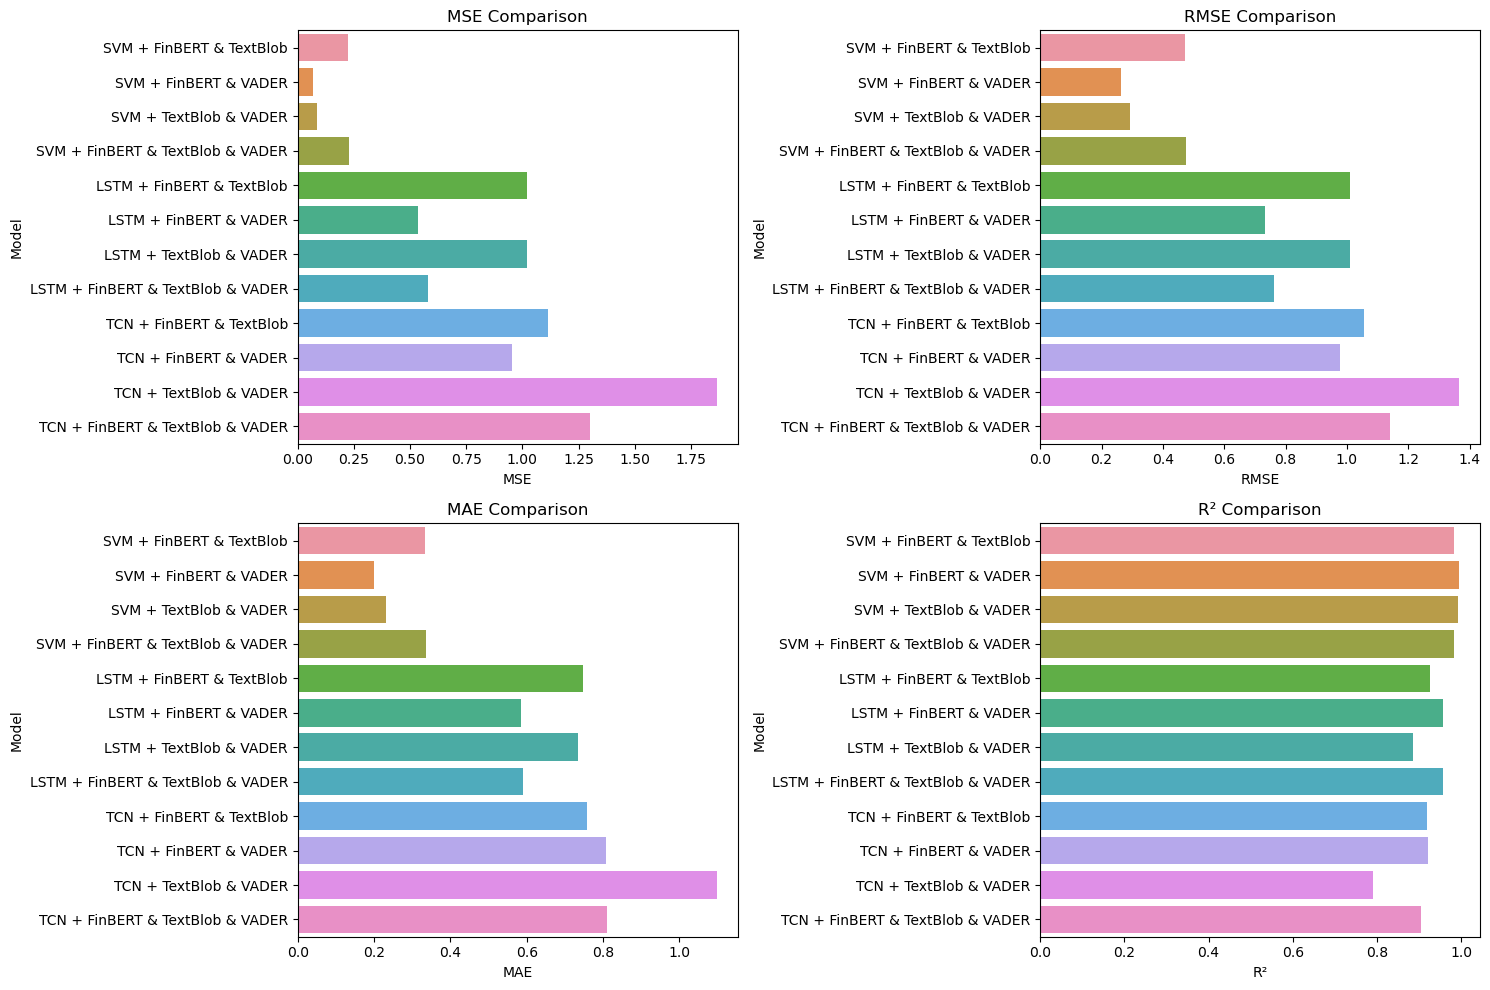

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据
data = {
    'Model': [
        'SVM + FinBERT & TextBlob', 'SVM + FinBERT & VADER', 'SVM + TextBlob & VADER', 'SVM + FinBERT & TextBlob & VADER', 
        'LSTM + FinBERT & TextBlob', 'LSTM + FinBERT & VADER', 'LSTM + TextBlob & VADER', 'LSTM + FinBERT & TextBlob & VADER',
        'TCN + FinBERT & TextBlob', 'TCN + FinBERT & VADER', 'TCN + TextBlob & VADER', 'TCN + FinBERT & TextBlob & VADER'
    ],
    'MSE': [0.2218, 0.0693, 0.0857, 0.2269, 1.0067, 0.4043, 1.0727, 0.5165, 1.4846, 0.9956, 1.7765, 1.2097],
    'RMSE': [0.4710, 0.2633, 0.2927, 0.4764, 1.0067, 0.6358, 1.0357, 0.7187, 1.2184, 0.9978, 1.3328, 1.0997],
    'MAE': [0.3333, 0.2001, 0.2310, 0.3358, 1.0067, 0.4934, 0.7553, 0.5438, 0.9286, 0.8048, 1.0658, 0.7744],
    'R²': [0.9823, 0.9950, 0.9934, 0.9819, 0.9267, 0.9669, 0.8983, 0.9624, 0.8919, 0.9185, 0.8008, 0.9119]
}

df = pd.DataFrame(data)

# 设置图像大小
plt.figure(figsize=(15, 10))

# 创建子图：MSE
plt.subplot(2, 2, 1)
sns.barplot(x='MSE', y='Model', data=df)
plt.title('MSE Comparison')

# 创建子图：RMSE
plt.subplot(2, 2, 2)
sns.barplot(x='RMSE', y='Model', data=df)
plt.title('RMSE Comparison')

# 创建子图：MAE
plt.subplot(2, 2, 3)
sns.barplot(x='MAE', y='Model', data=df)
plt.title('MAE Comparison')

# 创建子图：R²
plt.subplot(2, 2, 4)
sns.barplot(x='R²', y='Model', data=df)
plt.title('R² Comparison')

plt.tight_layout()
plt.show()


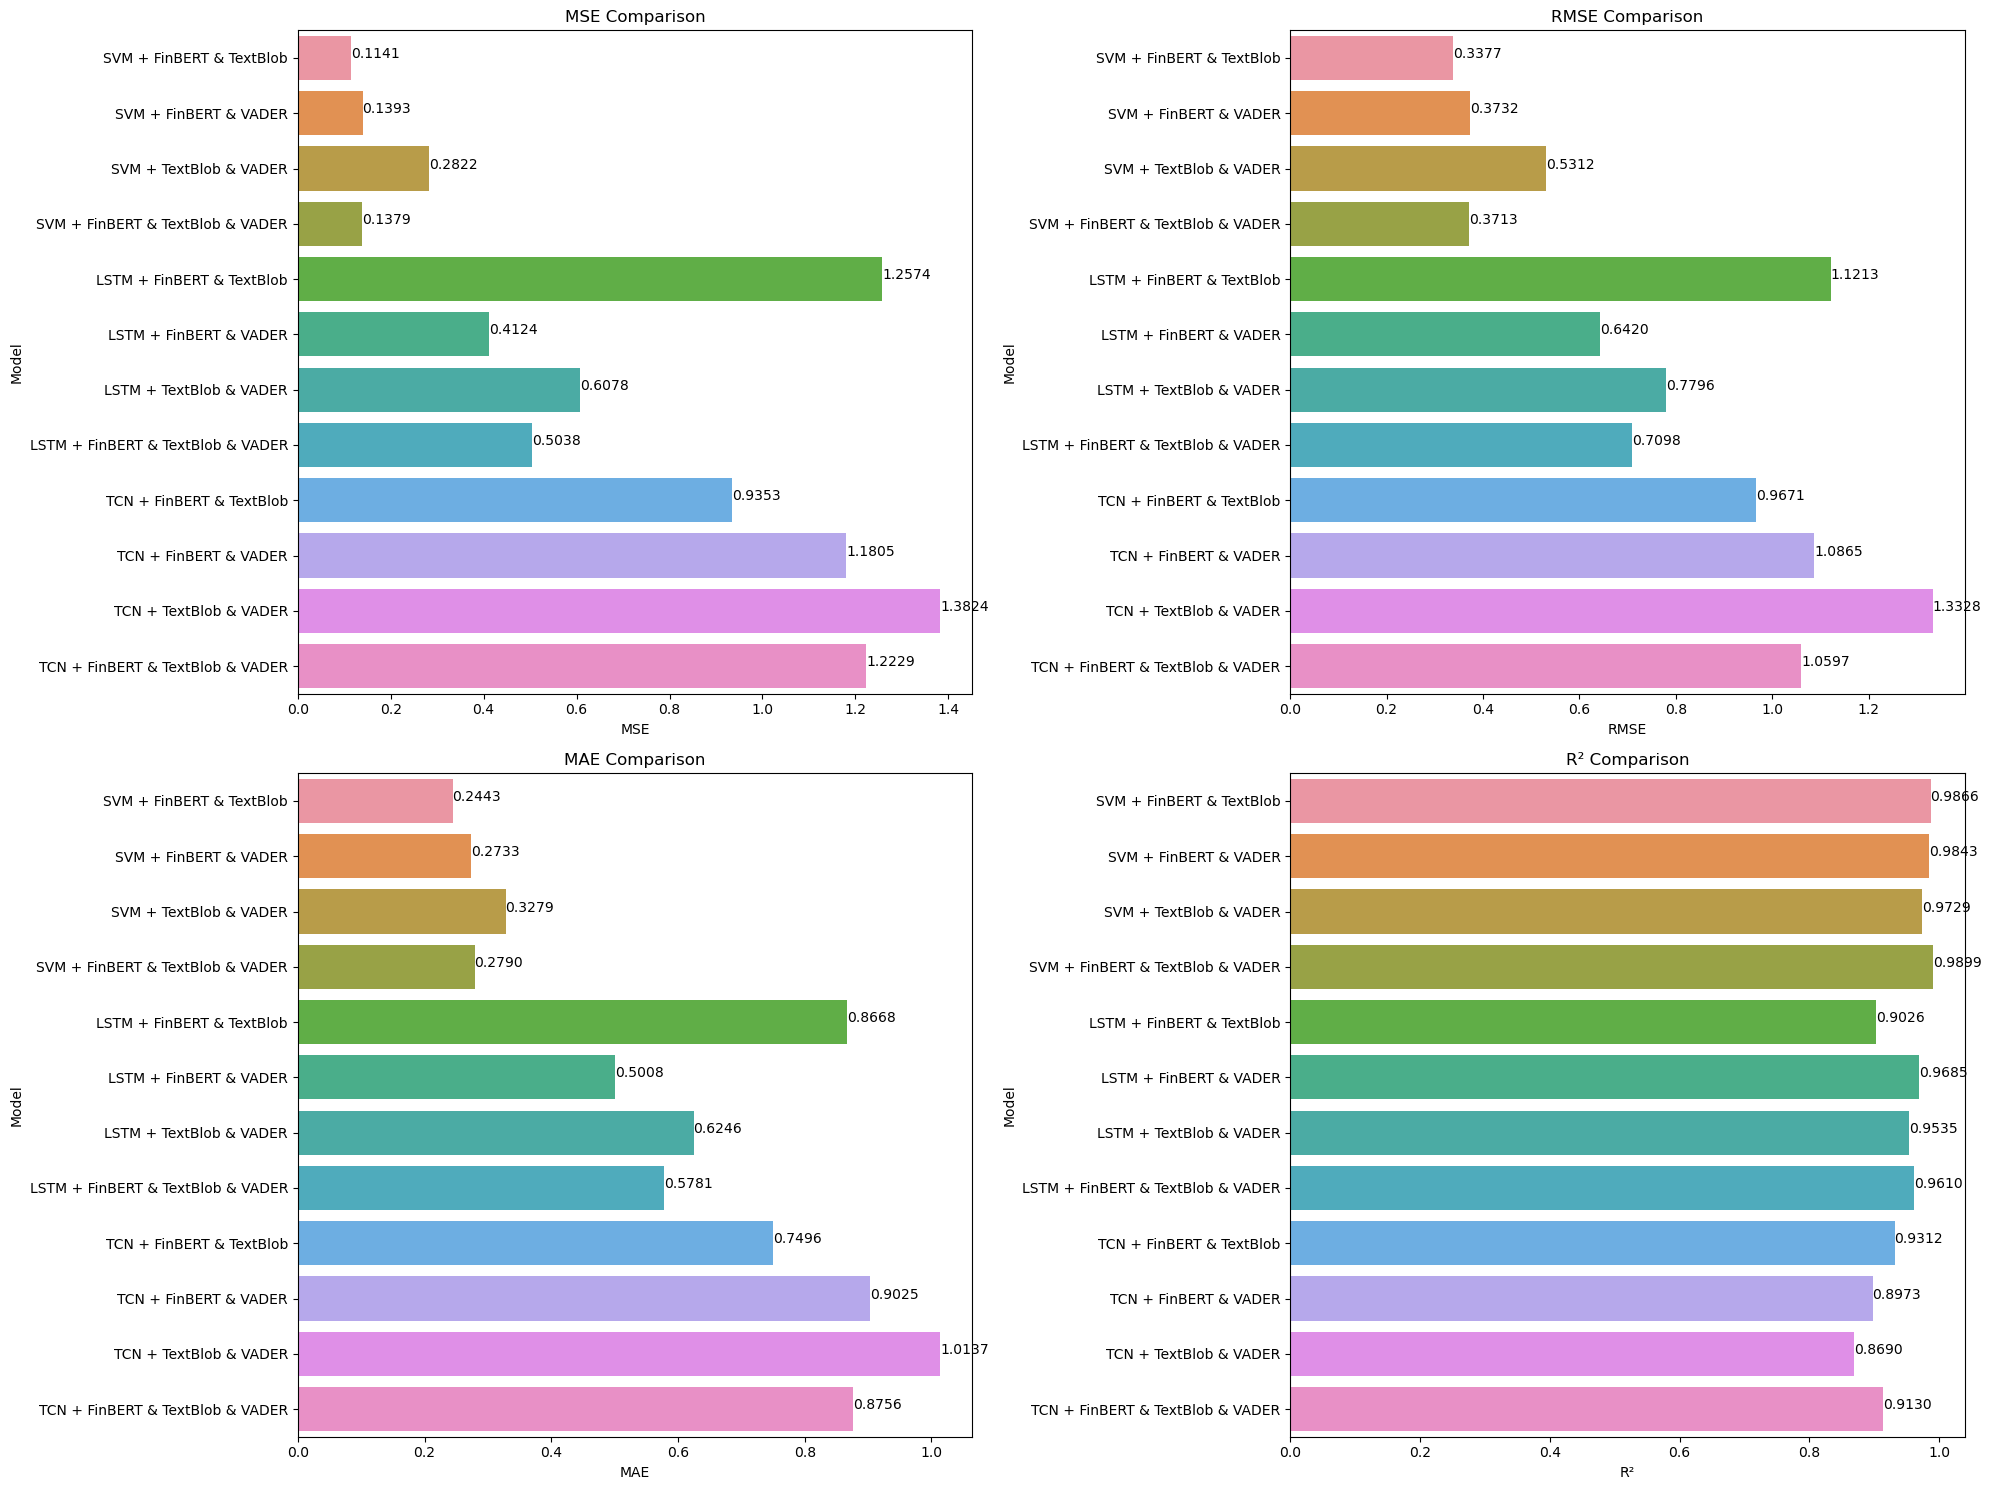

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据
data = {
    'Model': [
        'SVM + FinBERT & TextBlob', 'SVM + FinBERT & VADER', 'SVM + TextBlob & VADER', 'SVM + FinBERT & TextBlob & VADER', 
        'LSTM + FinBERT & TextBlob', 'LSTM + FinBERT & VADER', 'LSTM + TextBlob & VADER', 'LSTM + FinBERT & TextBlob & VADER',
        'TCN + FinBERT & TextBlob', 'TCN + FinBERT & VADER', 'TCN + TextBlob & VADER', 'TCN + FinBERT & TextBlob & VADER'
    ],
    'MSE': [0.1141, 0.1393, 0.2822, 0.1379, 1.2574, 0.4124,0.6078, 0.5038, 0.9353, 1.1805, 1.3824, 1.2229],
    'RMSE': [0.3377, 0.3732, 0.5312, 0.3713, 1.1213, 0.6420, 0.7796, 0.7098, 0.9671, 1.0865, 1.3328, 1.0597],
    'MAE': [0.2443, 0.2733, 0.3279, 0.2790, 0.8668, 0.5008, 0.6246, 0.5781, 0.7496, 0.9025, 1.0137, 0.8756],
    'R²': [0.9866, 0.9843, 0.9729, 0.9899, 0.9026, 0.9685, 0.9535, 0.9610, 0.9312, 0.8973, 0.8690, 0.9130]
}

df = pd.DataFrame(data)

# 设置图像大小
plt.figure(figsize=(20, 15))

# 创建子图：MSE
plt.subplot(2, 2, 1)
sns.barplot(x='MSE', y='Model', data=df)
plt.title('MSE Comparison')
for index, value in enumerate(df['MSE']):
    plt.text(value, index, f'{value:.4f}')

# 创建子图：RMSE
plt.subplot(2, 2, 2)
sns.barplot(x='RMSE', y='Model', data=df)
plt.title('RMSE Comparison')
for index, value in enumerate(df['RMSE']):
    plt.text(value, index, f'{value:.4f}')

# 创建子图：MAE
plt.subplot(2, 2, 3)
sns.barplot(x='MAE', y='Model', data=df)
plt.title('MAE Comparison')
for index, value in enumerate(df['MAE']):
    plt.text(value, index, f'{value:.4f}')

# 创建子图：R²
plt.subplot(2, 2, 4)
sns.barplot(x='R²', y='Model', data=df)
plt.title('R² Comparison')
for index, value in enumerate(df['R²']):
    plt.text(value, index, f'{value:.4f}')

plt.tight_layout()
plt.show()


In [13]:
#shift 2

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# 加载情绪结果文件
finbert_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_finbert.xlsx')
textblob_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_textblob.xlsx')
vader_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_vader.xlsx')

# 加载市场指数数据
spxd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/_SPXD.xlsx', sheet_name='Price Data')
spxtrd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/_SPXTRD.xlsx', sheet_name='Price Data')
vixd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/VIXD.xlsx', sheet_name='Price Data')

# 确保日期列为datetime类型
finbert_data['Date'] = pd.to_datetime(finbert_data['Date'])
textblob_data['Date'] = pd.to_datetime(textblob_data['Date'])
vader_data['Date'] = pd.to_datetime(vader_data['Date'])
spxd_data['Date'] = pd.to_datetime(spxd_data['Date'])
spxtrd_data['Date'] = pd.to_datetime(spxtrd_data['Date'])
vixd_data['Date'] = pd.to_datetime(vixd_data['Date'])

# 将情绪得分扩展到每日
def expand_to_daily(data):
    daily_data = data.set_index('Date').resample('D').ffill().reset_index()
    return daily_data

finbert_data_daily = expand_to_daily(finbert_data)
textblob_data_daily = expand_to_daily(textblob_data)
vader_data_daily = expand_to_daily(vader_data)

# 合并情绪得分数据
sentiment_data = pd.merge(finbert_data_daily, textblob_data_daily, on='Date', how='outer', suffixes=('_finbert', '_textblob'))
sentiment_data = pd.merge(sentiment_data, vader_data_daily, on='Date', how='outer')

# 合并市场指数数据
market_data = pd.merge(spxd_data, spxtrd_data, on='Date', how='outer', suffixes=('_spxd', '_spxtrd'))
market_data = pd.merge(market_data, vixd_data, on='Date', how='outer')

# 合并所有数据
data = pd.merge(sentiment_data, market_data, on='Date', how='outer')
data.set_index('Date', inplace=True)

# 删除所有包含 NaN 值的行
data = data.dropna()

# 检查合并后的日期范围
print("Merged Data Date Range:")
print(data.index.min(), data.index.max())




Merged Data Date Range:
2021-12-17 00:00:00 2022-12-30 00:00:00


C:\Users\22749\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Train on 155 samples, validate on 52 samples
Epoch 1/1700
155/155 [==============================] - 6s 41ms/sample - loss: 667.0428 - val_loss: 606.5753
Epoch 2/1700
155/155 [==============================] - 0s 562us/sample - loss: 653.9613 - val_loss: 591.0972
Epoch 3/1700
155/155 [==============================] - 0s 1ms/sample - loss: 636.0424 - val_loss: 568.6711
Epoch 4/1700
155/155 [==============================] - 0s 575us/sample - loss: 608.1134 - val_loss: 535.0784
Epoch 5/1700
155/155 [==============================] - 0s 598us/sample - loss: 567.7541 - val_loss: 484.4845
Epoch 6/1700
155/155 [==============================] - 0s 679us/sample - loss: 510.4235 - val_loss: 409.8924
Epoch 7/1700
155/155 [==============================] - 0s 755us/sample - loss: 427.7882 - val_loss: 307.9447
Epoch 8/1700
155/155 [==============================] - 0s 921us/sample - loss: 313.3301 - val_loss: 186.2918
Epoch 9/1700
155/155 [==============================] - 0s 690us/sample - loss

155/155 [==============================] - 0s 547us/sample - loss: 10.8344 - val_loss: 6.4020
Epoch 77/1700
155/155 [==============================] - 0s 485us/sample - loss: 9.3669 - val_loss: 6.3237
Epoch 78/1700
155/155 [==============================] - 0s 534us/sample - loss: 9.9991 - val_loss: 6.2639
Epoch 79/1700
155/155 [==============================] - 0s 819us/sample - loss: 9.4630 - val_loss: 6.2185
Epoch 80/1700
155/155 [==============================] - 0s 602us/sample - loss: 8.8894 - val_loss: 6.1375
Epoch 81/1700
155/155 [==============================] - 0s 782us/sample - loss: 8.2656 - val_loss: 6.4991
Epoch 82/1700
155/155 [==============================] - 0s 769us/sample - loss: 9.0026 - val_loss: 5.9983
Epoch 83/1700
155/155 [==============================] - 0s 762us/sample - loss: 8.9461 - val_loss: 5.8806
Epoch 84/1700
155/155 [==============================] - 0s 588us/sample - loss: 9.3963 - val_loss: 5.8082
Epoch 85/1700
155/155 [===========================

Epoch 228/1700
155/155 [==============================] - 0s 450us/sample - loss: 3.8783 - val_loss: 2.1671
Epoch 229/1700
155/155 [==============================] - 0s 509us/sample - loss: 4.2372 - val_loss: 1.8852
Epoch 230/1700
155/155 [==============================] - 0s 1ms/sample - loss: 4.2346 - val_loss: 1.8499
Epoch 231/1700
155/155 [==============================] - 0s 504us/sample - loss: 3.3068 - val_loss: 1.7929
Epoch 232/1700
155/155 [==============================] - 0s 514us/sample - loss: 3.5138 - val_loss: 2.3273
Epoch 233/1700
155/155 [==============================] - 0s 514us/sample - loss: 3.6969 - val_loss: 1.8192
Epoch 234/1700
155/155 [==============================] - 0s 431us/sample - loss: 2.7118 - val_loss: 1.8237
Epoch 235/1700
155/155 [==============================] - 0s 486us/sample - loss: 3.8425 - val_loss: 2.7897
Epoch 236/1700
155/155 [==============================] - 0s 490us/sample - loss: 4.1393 - val_loss: 1.7799
Epoch 237/1700
155/155 [======

Epoch 304/1700
155/155 [==============================] - 0s 434us/sample - loss: 2.9747 - val_loss: 1.8464
Epoch 305/1700
155/155 [==============================] - 0s 372us/sample - loss: 2.9412 - val_loss: 1.5904
Epoch 306/1700
155/155 [==============================] - 0s 412us/sample - loss: 3.1811 - val_loss: 1.9099
Epoch 307/1700
155/155 [==============================] - 0s 341us/sample - loss: 3.0521 - val_loss: 1.8394
Epoch 308/1700
155/155 [==============================] - 0s 381us/sample - loss: 2.8564 - val_loss: 1.7592
Epoch 309/1700
155/155 [==============================] - 0s 351us/sample - loss: 2.9151 - val_loss: 1.9906
Epoch 310/1700
155/155 [==============================] - 0s 374us/sample - loss: 3.6577 - val_loss: 2.0365
Epoch 311/1700
155/155 [==============================] - 0s 399us/sample - loss: 3.3192 - val_loss: 1.8603
Epoch 312/1700
155/155 [==============================] - 0s 372us/sample - loss: 3.6300 - val_loss: 2.0604
Epoch 313/1700
155/155 [====

Epoch 380/1700
155/155 [==============================] - 0s 434us/sample - loss: 2.7748 - val_loss: 1.7186
Epoch 381/1700
155/155 [==============================] - 0s 402us/sample - loss: 2.6081 - val_loss: 1.9833
Epoch 382/1700
155/155 [==============================] - 0s 502us/sample - loss: 3.1793 - val_loss: 1.9552
Epoch 383/1700
155/155 [==============================] - 0s 512us/sample - loss: 3.1454 - val_loss: 1.6954
Epoch 384/1700
155/155 [==============================] - 0s 672us/sample - loss: 3.5468 - val_loss: 1.7792
Epoch 385/1700
155/155 [==============================] - 0s 549us/sample - loss: 2.6355 - val_loss: 1.4991
Epoch 386/1700
155/155 [==============================] - 0s 491us/sample - loss: 3.1227 - val_loss: 1.6306
Epoch 387/1700
155/155 [==============================] - 0s 542us/sample - loss: 3.0461 - val_loss: 2.5387
Epoch 388/1700
155/155 [==============================] - 0s 545us/sample - loss: 3.6219 - val_loss: 1.5202
Epoch 389/1700
155/155 [====

Epoch 456/1700
155/155 [==============================] - 0s 467us/sample - loss: 3.5185 - val_loss: 2.1254
Epoch 457/1700
155/155 [==============================] - 0s 643us/sample - loss: 2.8944 - val_loss: 2.2723
Epoch 458/1700
155/155 [==============================] - 0s 713us/sample - loss: 3.3821 - val_loss: 1.6281
Epoch 459/1700
155/155 [==============================] - 0s 507us/sample - loss: 3.1133 - val_loss: 2.4378
Epoch 460/1700
155/155 [==============================] - 0s 409us/sample - loss: 1.9922 - val_loss: 2.2008
Epoch 461/1700
155/155 [==============================] - 0s 402us/sample - loss: 3.2418 - val_loss: 1.8511
Epoch 462/1700
155/155 [==============================] - 0s 394us/sample - loss: 3.0504 - val_loss: 2.6238
Epoch 463/1700
155/155 [==============================] - 0s 344us/sample - loss: 2.9865 - val_loss: 2.1146
Epoch 464/1700
155/155 [==============================] - 0s 338us/sample - loss: 3.2200 - val_loss: 1.6617
Epoch 465/1700
155/155 [====

Epoch 532/1700
155/155 [==============================] - 0s 303us/sample - loss: 2.8032 - val_loss: 1.6376
Epoch 533/1700
155/155 [==============================] - 0s 311us/sample - loss: 2.8717 - val_loss: 1.9060
Epoch 534/1700
155/155 [==============================] - 0s 365us/sample - loss: 2.9870 - val_loss: 1.7039
Epoch 535/1700
155/155 [==============================] - 0s 324us/sample - loss: 2.9465 - val_loss: 2.0282
Epoch 536/1700
155/155 [==============================] - 0s 348us/sample - loss: 3.2686 - val_loss: 1.9320
Epoch 537/1700
155/155 [==============================] - 0s 321us/sample - loss: 2.8233 - val_loss: 1.7063
Epoch 538/1700
155/155 [==============================] - 0s 324us/sample - loss: 2.8996 - val_loss: 1.7618
Epoch 539/1700
155/155 [==============================] - 0s 325us/sample - loss: 2.5945 - val_loss: 2.3230
Epoch 540/1700
155/155 [==============================] - 0s 316us/sample - loss: 2.3911 - val_loss: 2.0479
Epoch 541/1700
155/155 [====

Epoch 608/1700
155/155 [==============================] - 0s 228us/sample - loss: 2.0467 - val_loss: 1.7842
Epoch 609/1700
155/155 [==============================] - 0s 227us/sample - loss: 2.3511 - val_loss: 1.7413
Epoch 610/1700
155/155 [==============================] - 0s 237us/sample - loss: 2.8270 - val_loss: 1.8956
Epoch 611/1700
155/155 [==============================] - 0s 203us/sample - loss: 2.4631 - val_loss: 2.0510
Epoch 612/1700
155/155 [==============================] - 0s 219us/sample - loss: 2.4158 - val_loss: 2.3872
Epoch 613/1700
155/155 [==============================] - 0s 237us/sample - loss: 2.2704 - val_loss: 2.1999
Epoch 614/1700
155/155 [==============================] - 0s 225us/sample - loss: 2.2723 - val_loss: 1.9755
Epoch 615/1700
155/155 [==============================] - 0s 207us/sample - loss: 2.4058 - val_loss: 2.1626
Epoch 616/1700
155/155 [==============================] - 0s 246us/sample - loss: 2.3034 - val_loss: 2.2031
Epoch 617/1700
155/155 [====

Epoch 684/1700
155/155 [==============================] - 0s 225us/sample - loss: 1.9363 - val_loss: 1.6160
Epoch 685/1700
155/155 [==============================] - 0s 239us/sample - loss: 2.2607 - val_loss: 1.9739
Epoch 686/1700
155/155 [==============================] - 0s 233us/sample - loss: 1.9781 - val_loss: 1.6009
Epoch 687/1700
155/155 [==============================] - 0s 212us/sample - loss: 2.4228 - val_loss: 2.1643
Epoch 688/1700
155/155 [==============================] - 0s 216us/sample - loss: 2.1467 - val_loss: 1.8177
Epoch 689/1700
155/155 [==============================] - 0s 215us/sample - loss: 2.5410 - val_loss: 1.8600
Epoch 690/1700
155/155 [==============================] - 0s 239us/sample - loss: 2.0122 - val_loss: 1.8244
Epoch 691/1700
155/155 [==============================] - 0s 223us/sample - loss: 2.4670 - val_loss: 1.5857
Epoch 692/1700
155/155 [==============================] - 0s 215us/sample - loss: 2.7023 - val_loss: 1.8636
Epoch 693/1700
155/155 [====

Epoch 760/1700
155/155 [==============================] - 0s 235us/sample - loss: 1.9294 - val_loss: 2.0034
Epoch 761/1700
155/155 [==============================] - 0s 212us/sample - loss: 2.3056 - val_loss: 1.9006
Epoch 762/1700
155/155 [==============================] - 0s 215us/sample - loss: 2.0639 - val_loss: 1.6537
Epoch 763/1700
155/155 [==============================] - 0s 221us/sample - loss: 2.5236 - val_loss: 2.4275
Epoch 764/1700
155/155 [==============================] - 0s 180us/sample - loss: 2.1938 - val_loss: 1.9849
Epoch 765/1700
155/155 [==============================] - 0s 209us/sample - loss: 1.9524 - val_loss: 1.5447
Epoch 766/1700
155/155 [==============================] - 0s 229us/sample - loss: 1.6616 - val_loss: 2.0957
Epoch 767/1700
155/155 [==============================] - 0s 291us/sample - loss: 2.0503 - val_loss: 1.9441
Epoch 768/1700
155/155 [==============================] - 0s 246us/sample - loss: 2.0781 - val_loss: 1.7206
Epoch 769/1700
155/155 [====

Epoch 836/1700
155/155 [==============================] - 0s 236us/sample - loss: 1.7979 - val_loss: 2.3785
Epoch 837/1700
155/155 [==============================] - 0s 223us/sample - loss: 2.4772 - val_loss: 2.1838
Epoch 838/1700
155/155 [==============================] - 0s 258us/sample - loss: 2.0008 - val_loss: 1.9666
Epoch 839/1700
155/155 [==============================] - 0s 235us/sample - loss: 2.1553 - val_loss: 1.8478
Epoch 840/1700
155/155 [==============================] - 0s 259us/sample - loss: 2.0702 - val_loss: 1.6439
Epoch 841/1700
155/155 [==============================] - 0s 273us/sample - loss: 1.8002 - val_loss: 2.0085
Epoch 842/1700
155/155 [==============================] - 0s 212us/sample - loss: 1.8953 - val_loss: 1.6984
Epoch 843/1700
155/155 [==============================] - 0s 236us/sample - loss: 1.7513 - val_loss: 1.6873
Epoch 844/1700
155/155 [==============================] - 0s 224us/sample - loss: 2.1841 - val_loss: 2.4034
Epoch 845/1700
155/155 [====

Epoch 912/1700
155/155 [==============================] - 0s 335us/sample - loss: 1.9459 - val_loss: 1.6150
Epoch 913/1700
155/155 [==============================] - 0s 318us/sample - loss: 1.8892 - val_loss: 1.6703
Epoch 914/1700
155/155 [==============================] - 0s 257us/sample - loss: 2.3004 - val_loss: 1.7733
Epoch 915/1700
155/155 [==============================] - 0s 282us/sample - loss: 1.9183 - val_loss: 1.6142
Epoch 916/1700
155/155 [==============================] - 0s 293us/sample - loss: 2.2602 - val_loss: 1.5951
Epoch 917/1700
155/155 [==============================] - 0s 295us/sample - loss: 1.9950 - val_loss: 2.1860
Epoch 918/1700
155/155 [==============================] - 0s 303us/sample - loss: 2.3959 - val_loss: 1.6478
Epoch 919/1700
155/155 [==============================] - 0s 284us/sample - loss: 2.3609 - val_loss: 1.6241
Epoch 920/1700
155/155 [==============================] - 0s 298us/sample - loss: 1.7686 - val_loss: 1.9910
Epoch 921/1700
155/155 [====

Epoch 988/1700
155/155 [==============================] - 0s 299us/sample - loss: 2.0257 - val_loss: 1.8182
Epoch 989/1700
155/155 [==============================] - 0s 318us/sample - loss: 1.9368 - val_loss: 1.7619
Epoch 990/1700
155/155 [==============================] - 0s 420us/sample - loss: 1.7391 - val_loss: 1.8027
Epoch 991/1700
155/155 [==============================] - 0s 336us/sample - loss: 1.8564 - val_loss: 1.5984
Epoch 992/1700
155/155 [==============================] - 0s 244us/sample - loss: 1.7234 - val_loss: 2.1079
Epoch 993/1700
155/155 [==============================] - 0s 290us/sample - loss: 2.0454 - val_loss: 1.5711
Epoch 994/1700
155/155 [==============================] - 0s 422us/sample - loss: 2.2917 - val_loss: 1.4892
Epoch 995/1700
155/155 [==============================] - 0s 391us/sample - loss: 1.8445 - val_loss: 1.9444
Epoch 996/1700
155/155 [==============================] - 0s 310us/sample - loss: 1.6993 - val_loss: 1.5838
Epoch 997/1700
155/155 [====

155/155 [==============================] - 0s 302us/sample - loss: 1.5040 - val_loss: 1.5093
Epoch 1139/1700
155/155 [==============================] - 0s 323us/sample - loss: 1.6839 - val_loss: 1.4493
Epoch 1140/1700
155/155 [==============================] - 0s 299us/sample - loss: 1.9870 - val_loss: 1.9048
Epoch 1141/1700
155/155 [==============================] - 0s 334us/sample - loss: 1.6975 - val_loss: 1.5642
Epoch 1142/1700
155/155 [==============================] - 0s 460us/sample - loss: 1.6308 - val_loss: 1.9346
Epoch 1143/1700
155/155 [==============================] - 0s 298us/sample - loss: 1.3683 - val_loss: 1.9805
Epoch 1144/1700
155/155 [==============================] - 0s 263us/sample - loss: 1.5221 - val_loss: 1.5577
Epoch 1145/1700
155/155 [==============================] - 0s 573us/sample - loss: 1.7786 - val_loss: 1.8891
Epoch 1146/1700
155/155 [==============================] - 0s 613us/sample - loss: 1.7431 - val_loss: 1.6836
Epoch 1147/1700
155/155 [==========

155/155 [==============================] - 0s 792us/sample - loss: 1.7030 - val_loss: 1.5822
Epoch 1289/1700
155/155 [==============================] - 0s 347us/sample - loss: 1.5096 - val_loss: 1.4886
Epoch 1290/1700
155/155 [==============================] - 0s 355us/sample - loss: 1.4629 - val_loss: 1.6397
Epoch 1291/1700
155/155 [==============================] - 0s 347us/sample - loss: 1.2425 - val_loss: 1.6449
Epoch 1292/1700
155/155 [==============================] - 0s 435us/sample - loss: 1.4883 - val_loss: 1.5423
Epoch 1293/1700
155/155 [==============================] - 0s 440us/sample - loss: 1.5200 - val_loss: 1.5396
Epoch 1294/1700
155/155 [==============================] - 0s 369us/sample - loss: 1.5408 - val_loss: 1.4115
Epoch 1295/1700
155/155 [==============================] - 0s 392us/sample - loss: 1.9070 - val_loss: 1.1963
Epoch 1296/1700
155/155 [==============================] - 0s 396us/sample - loss: 1.7183 - val_loss: 1.4415
Epoch 1297/1700
155/155 [==========

155/155 [==============================] - 0s 449us/sample - loss: 1.3512 - val_loss: 1.3704
Epoch 1439/1700
155/155 [==============================] - 0s 399us/sample - loss: 1.7785 - val_loss: 1.6662
Epoch 1440/1700
155/155 [==============================] - 0s 337us/sample - loss: 1.2834 - val_loss: 1.6780
Epoch 1441/1700
155/155 [==============================] - 0s 322us/sample - loss: 1.1482 - val_loss: 1.2642
Epoch 1442/1700
155/155 [==============================] - 0s 495us/sample - loss: 1.2893 - val_loss: 1.3554
Epoch 1443/1700
155/155 [==============================] - 0s 415us/sample - loss: 1.8347 - val_loss: 1.4205
Epoch 1444/1700
155/155 [==============================] - 0s 353us/sample - loss: 1.3055 - val_loss: 1.3407
Epoch 1445/1700
155/155 [==============================] - 0s 334us/sample - loss: 1.5500 - val_loss: 1.2167
Epoch 1446/1700
155/155 [==============================] - 0s 320us/sample - loss: 1.3602 - val_loss: 1.3820
Epoch 1447/1700
155/155 [==========

155/155 [==============================] - 0s 444us/sample - loss: 1.1696 - val_loss: 1.2394
Epoch 1589/1700
155/155 [==============================] - 0s 425us/sample - loss: 1.2040 - val_loss: 1.3676
Epoch 1590/1700
155/155 [==============================] - 0s 424us/sample - loss: 1.1440 - val_loss: 1.3371
Epoch 1591/1700
155/155 [==============================] - 0s 418us/sample - loss: 1.2849 - val_loss: 1.3599
Epoch 1592/1700
155/155 [==============================] - 0s 415us/sample - loss: 1.1572 - val_loss: 1.3229
Epoch 1593/1700
155/155 [==============================] - 0s 405us/sample - loss: 1.1783 - val_loss: 1.4178
Epoch 1594/1700
155/155 [==============================] - 0s 465us/sample - loss: 1.1630 - val_loss: 1.2470
Epoch 1595/1700
155/155 [==============================] - 0s 2ms/sample - loss: 1.8037 - val_loss: 1.1611
Epoch 1596/1700
155/155 [==============================] - 0s 379us/sample - loss: 1.2252 - val_loss: 1.6759
Epoch 1597/1700
155/155 [============

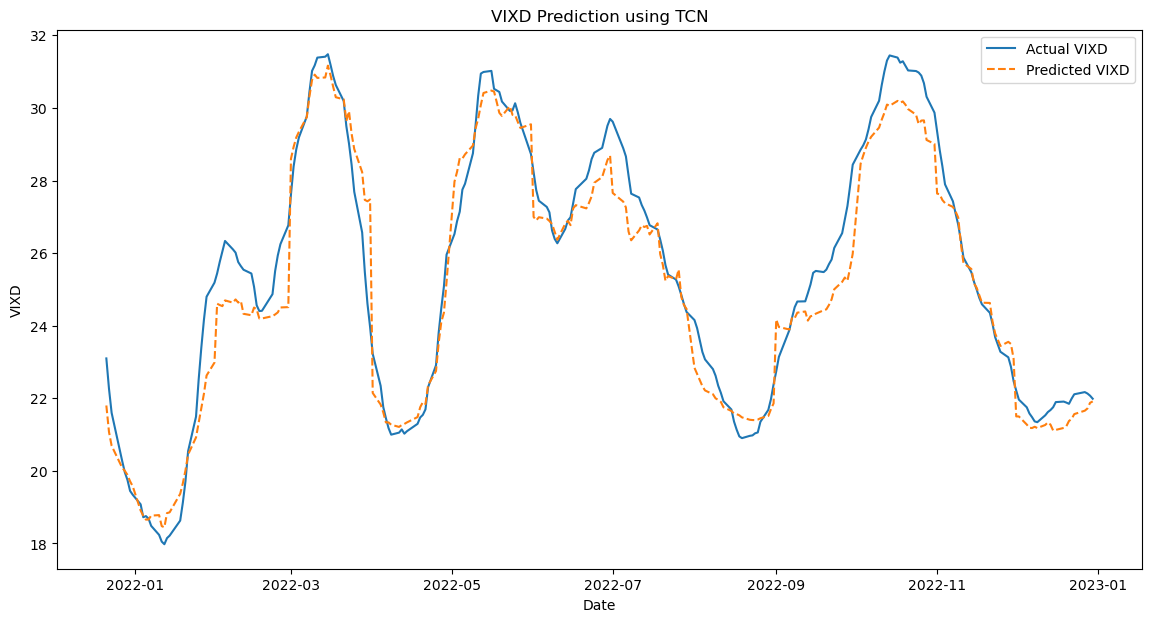

In [15]:
#finbert + textblob
# Select features and target with a lag of 2 days
lag = 2
X = data[['Overall Positive Sentiment', 'Overall Neutral Sentiment', 'Overall Negative Sentiment', 
          'Polarity', 'Subjectivity', 
          'Average_SPXD', 'Close_SPXD', 'Close_SPXTRD', 'Average_SPXTRD']]

# Apply lag to the features
X_lagged = X.shift(lag)
y = data['Average_VIXD']

# Drop NaN values from the features and target variable
X_lagged = X_lagged.dropna()
y = y.loc[X_lagged.index]

# Apply weights to features
weights = {
    'Overall Positive Sentiment': 0.1,
    'Overall Neutral Sentiment': 0.7,
    'Overall Negative Sentiment': 0.1,
    'Polarity': 0.8,
    'Subjectivity': 0.5,
    'Average_SPXD': 0.9,
    'Close_SPXD': 0.9,
    'Close_SPXTRD': 0.9,
    'Average_SPXTRD': 0.9
}
for col, weight in weights.items():
    X[col] = X[col] * weight

# 确保特征和目标变量的索引对齐
X = X.loc[y.index]
data = data.loc[y.index]  # 同步删除 data 中的对应行

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拆分训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 转换为张量并添加一个维度用于Conv1D
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# 定义TCN模型
def build_tcn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=2, padding='causal', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=32, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=64, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
model = build_tcn_model(input_shape)

# 训练模型
history = model.fit(X_train, y_train, epochs=1700, validation_data=(X_val, y_val), batch_size=32)

# 在验证集上评估模型
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Validation Mean Squared Error: {val_mse}')
print(f'Validation Root Mean Squared Error: {val_rmse}')
print(f'Validation Mean Absolute Error: {val_mae}')
print(f'Validation R^2 Score: {val_r2}')

# 在测试集上评估模型
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test Root Mean Squared Error: {test_rmse}')
print(f'Test Mean Absolute Error: {test_mae}')
print(f'Test R^2 Score: {test_r2}')

# 可视化预测结果
predicted_vixd = model.predict(np.expand_dims(X_scaled, axis=2))
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Average_VIXD'], label='Actual VIXD')
plt.plot(data.index[:len(predicted_vixd)], predicted_vixd, label='Predicted VIXD', linestyle='--')
plt.xlabel('Date')
plt.ylabel('VIXD')
plt.title('VIXD Prediction using TCN')
plt.legend()
plt.show()

In [16]:
import scipy.stats as stats

# 计算F统计量和P值的函数
def calculate_f_p_values(y_true, y_pred, X):
    n = len(y_true)  # 样本数
    k = X.shape[1]  # 特征数
    ssr = np.sum((y_pred.flatten() - y_true.mean()) ** 2)  # 回归平方和
    sse = np.sum((y_true - y_pred.flatten()) ** 2)  # 残差平方和
    msr = ssr / k  # 回归均方
    mse = sse / (n - k - 1)  # 残差均方
    f_stat = msr / mse  # F统计量
    p_value = stats.f.sf(f_stat, k, n - k - 1)  # P值
    return f_stat, p_value

# 对验证集进行计算
f_stat_val, p_value_val = calculate_f_p_values(y_val, y_val_pred, X_val)
print(f'Validation F-statistic: {f_stat_val}')
print(f'Validation P-value: {p_value_val}')

# 对测试集进行计算
f_stat_test, p_value_test = calculate_f_p_values(y_test, y_test_pred, X_test)
print(f'Test F-statistic: {f_stat_test}')
print(f'Test P-value: {p_value_test}')



Validation F-statistic: 39.8455994360803
Validation P-value: 9.690730048577695e-18
Test F-statistic: 57.8751305568594
Test P-value: 8.566253865771594e-21


C:\Users\22749\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Train on 154 samples, validate on 51 samples
Epoch 1/1800
154/154 [==============================] - 3s 18ms/sample - loss: 673.4199 - val_loss: 641.7342
Epoch 2/1800
154/154 [==============================] - 0s 887us/sample - loss: 658.0323 - val_loss: 625.6858
Epoch 3/1800
154/154 [==============================] - 0s 1ms/sample - loss: 638.3380 - val_loss: 602.7203
Epoch 4/1800
154/154 [==============================] - 0s 641us/sample - loss: 611.1095 - val_loss: 567.8745
Epoch 5/1800
154/154 [==============================] - 0s 916us/sample - loss: 568.0494 - val_loss: 514.6653
Epoch 6/1800
154/154 [==============================] - 0s 790us/sample - loss: 505.3476 - val_loss: 436.3321
Epoch 7/1800
154/154 [==============================] - 0s 692us/sample - loss: 415.5268 - val_loss: 328.0868
Epoch 8/1800
154/154 [==============================] - 0s 693us/sample - loss: 295.1198 - val_loss: 196.9838
Epoch 9/1800
154/154 [==============================] - 0s 771us/sample - loss

154/154 [==============================] - 0s 693us/sample - loss: 14.1921 - val_loss: 7.6576
Epoch 77/1800
154/154 [==============================] - 0s 449us/sample - loss: 12.9757 - val_loss: 7.4642
Epoch 78/1800
154/154 [==============================] - 0s 448us/sample - loss: 13.7039 - val_loss: 7.6234
Epoch 79/1800
154/154 [==============================] - 0s 466us/sample - loss: 14.3414 - val_loss: 7.3499
Epoch 80/1800
154/154 [==============================] - 0s 420us/sample - loss: 14.1845 - val_loss: 7.1809
Epoch 81/1800
154/154 [==============================] - 0s 436us/sample - loss: 14.3561 - val_loss: 7.7538
Epoch 82/1800
154/154 [==============================] - 0s 472us/sample - loss: 12.1671 - val_loss: 7.0557
Epoch 83/1800
154/154 [==============================] - 0s 628us/sample - loss: 13.7363 - val_loss: 6.9353
Epoch 84/1800
154/154 [==============================] - 0s 596us/sample - loss: 12.4829 - val_loss: 6.9602
Epoch 85/1800
154/154 [===================

Epoch 152/1800
154/154 [==============================] - 0s 350us/sample - loss: 6.3840 - val_loss: 2.8875
Epoch 153/1800
154/154 [==============================] - 0s 314us/sample - loss: 6.3816 - val_loss: 3.5568
Epoch 154/1800
154/154 [==============================] - 0s 320us/sample - loss: 6.7993 - val_loss: 2.9056
Epoch 155/1800
154/154 [==============================] - 0s 382us/sample - loss: 5.2176 - val_loss: 2.7989
Epoch 156/1800
154/154 [==============================] - 0s 390us/sample - loss: 5.9672 - val_loss: 2.9716
Epoch 157/1800
154/154 [==============================] - 0s 388us/sample - loss: 5.4554 - val_loss: 2.5751
Epoch 158/1800
154/154 [==============================] - 0s 399us/sample - loss: 7.3058 - val_loss: 2.4389
Epoch 159/1800
154/154 [==============================] - 0s 412us/sample - loss: 5.5070 - val_loss: 2.5822
Epoch 160/1800
154/154 [==============================] - 0s 396us/sample - loss: 6.7632 - val_loss: 3.0634
Epoch 161/1800
154/154 [====

Epoch 228/1800
154/154 [==============================] - 0s 383us/sample - loss: 4.2794 - val_loss: 2.0112
Epoch 229/1800
154/154 [==============================] - 0s 390us/sample - loss: 4.4769 - val_loss: 2.0334
Epoch 230/1800
154/154 [==============================] - 0s 339us/sample - loss: 4.2994 - val_loss: 2.5817
Epoch 231/1800
154/154 [==============================] - 0s 354us/sample - loss: 4.4156 - val_loss: 1.9823
Epoch 232/1800
154/154 [==============================] - 0s 378us/sample - loss: 3.9512 - val_loss: 2.1441
Epoch 233/1800
154/154 [==============================] - 0s 370us/sample - loss: 4.4953 - val_loss: 2.1302
Epoch 234/1800
154/154 [==============================] - 0s 405us/sample - loss: 4.3566 - val_loss: 2.4768
Epoch 235/1800
154/154 [==============================] - 0s 297us/sample - loss: 4.4827 - val_loss: 1.8162
Epoch 236/1800
154/154 [==============================] - 0s 340us/sample - loss: 4.7533 - val_loss: 2.4915
Epoch 237/1800
154/154 [====

Epoch 304/1800
154/154 [==============================] - 0s 554us/sample - loss: 3.1361 - val_loss: 1.6310
Epoch 305/1800
154/154 [==============================] - 0s 408us/sample - loss: 3.6966 - val_loss: 2.1948
Epoch 306/1800
154/154 [==============================] - 0s 372us/sample - loss: 3.8865 - val_loss: 2.0901
Epoch 307/1800
154/154 [==============================] - 0s 331us/sample - loss: 3.8991 - val_loss: 1.5781
Epoch 308/1800
154/154 [==============================] - 0s 388us/sample - loss: 3.7553 - val_loss: 1.3428
Epoch 309/1800
154/154 [==============================] - 0s 418us/sample - loss: 3.7603 - val_loss: 2.0844
Epoch 310/1800
154/154 [==============================] - 0s 343us/sample - loss: 3.9206 - val_loss: 1.9952
Epoch 311/1800
154/154 [==============================] - 0s 327us/sample - loss: 3.3613 - val_loss: 2.5716
Epoch 312/1800
154/154 [==============================] - 0s 359us/sample - loss: 4.8570 - val_loss: 1.8730
Epoch 313/1800
154/154 [====

Epoch 380/1800
154/154 [==============================] - 0s 303us/sample - loss: 2.9495 - val_loss: 2.1441
Epoch 381/1800
154/154 [==============================] - 0s 365us/sample - loss: 2.8384 - val_loss: 1.2953
Epoch 382/1800
154/154 [==============================] - 0s 323us/sample - loss: 3.5168 - val_loss: 2.1124
Epoch 383/1800
154/154 [==============================] - 0s 339us/sample - loss: 3.2355 - val_loss: 1.4077
Epoch 384/1800
154/154 [==============================] - 0s 316us/sample - loss: 3.1647 - val_loss: 2.3983
Epoch 385/1800
154/154 [==============================] - 0s 293us/sample - loss: 3.1619 - val_loss: 1.5872
Epoch 386/1800
154/154 [==============================] - 0s 334us/sample - loss: 3.2003 - val_loss: 1.9120
Epoch 387/1800
154/154 [==============================] - 0s 301us/sample - loss: 3.4982 - val_loss: 2.2412
Epoch 388/1800
154/154 [==============================] - 0s 306us/sample - loss: 3.6035 - val_loss: 1.7207
Epoch 389/1800
154/154 [====

Epoch 456/1800
154/154 [==============================] - 0s 341us/sample - loss: 3.2162 - val_loss: 1.1698
Epoch 457/1800
154/154 [==============================] - 0s 310us/sample - loss: 2.6128 - val_loss: 2.3065
Epoch 458/1800
154/154 [==============================] - 0s 409us/sample - loss: 3.8057 - val_loss: 1.5865
Epoch 459/1800
154/154 [==============================] - 0s 402us/sample - loss: 3.2008 - val_loss: 1.3551
Epoch 460/1800
154/154 [==============================] - 0s 329us/sample - loss: 3.0137 - val_loss: 2.3953
Epoch 461/1800
154/154 [==============================] - 0s 301us/sample - loss: 3.1895 - val_loss: 1.2958
Epoch 462/1800
154/154 [==============================] - 0s 316us/sample - loss: 2.9227 - val_loss: 2.1375
Epoch 463/1800
154/154 [==============================] - 0s 319us/sample - loss: 3.1314 - val_loss: 1.9193
Epoch 464/1800
154/154 [==============================] - 0s 359us/sample - loss: 2.7587 - val_loss: 1.3580
Epoch 465/1800
154/154 [====

Epoch 532/1800
154/154 [==============================] - 0s 311us/sample - loss: 2.5499 - val_loss: 1.3793
Epoch 533/1800
154/154 [==============================] - 0s 431us/sample - loss: 1.9007 - val_loss: 1.9908
Epoch 534/1800
154/154 [==============================] - 0s 357us/sample - loss: 3.3064 - val_loss: 1.9305
Epoch 535/1800
154/154 [==============================] - 0s 281us/sample - loss: 2.7036 - val_loss: 1.3933
Epoch 536/1800
154/154 [==============================] - 0s 353us/sample - loss: 3.5693 - val_loss: 2.8833
Epoch 537/1800
154/154 [==============================] - 0s 262us/sample - loss: 3.1605 - val_loss: 1.0009
Epoch 538/1800
154/154 [==============================] - 0s 232us/sample - loss: 3.2334 - val_loss: 2.7236
Epoch 539/1800
154/154 [==============================] - 0s 293us/sample - loss: 2.9697 - val_loss: 1.7449
Epoch 540/1800
154/154 [==============================] - 0s 268us/sample - loss: 2.4437 - val_loss: 1.1971
Epoch 541/1800
154/154 [====

Epoch 608/1800
154/154 [==============================] - 0s 277us/sample - loss: 2.3375 - val_loss: 1.7835
Epoch 609/1800
154/154 [==============================] - 0s 267us/sample - loss: 2.1364 - val_loss: 1.3601
Epoch 610/1800
154/154 [==============================] - 0s 264us/sample - loss: 2.2262 - val_loss: 2.3073
Epoch 611/1800
154/154 [==============================] - 0s 328us/sample - loss: 2.3802 - val_loss: 1.4188
Epoch 612/1800
154/154 [==============================] - 0s 299us/sample - loss: 2.3291 - val_loss: 2.0664
Epoch 613/1800
154/154 [==============================] - 0s 296us/sample - loss: 2.8585 - val_loss: 1.6544
Epoch 614/1800
154/154 [==============================] - 0s 317us/sample - loss: 3.1759 - val_loss: 1.8146
Epoch 615/1800
154/154 [==============================] - 0s 380us/sample - loss: 2.5150 - val_loss: 1.6757
Epoch 616/1800
154/154 [==============================] - 0s 321us/sample - loss: 2.9514 - val_loss: 1.4086
Epoch 617/1800
154/154 [====

Epoch 684/1800
154/154 [==============================] - 0s 437us/sample - loss: 2.0215 - val_loss: 1.7614
Epoch 685/1800
154/154 [==============================] - 0s 455us/sample - loss: 2.1119 - val_loss: 1.7731
Epoch 686/1800
154/154 [==============================] - 0s 473us/sample - loss: 2.2600 - val_loss: 2.1361
Epoch 687/1800
154/154 [==============================] - 0s 498us/sample - loss: 2.3522 - val_loss: 1.7562
Epoch 688/1800
154/154 [==============================] - 0s 467us/sample - loss: 2.2602 - val_loss: 1.4078
Epoch 689/1800
154/154 [==============================] - 0s 436us/sample - loss: 3.1207 - val_loss: 1.9039
Epoch 690/1800
154/154 [==============================] - 0s 513us/sample - loss: 2.1285 - val_loss: 1.2953
Epoch 691/1800
154/154 [==============================] - 0s 743us/sample - loss: 2.0351 - val_loss: 1.8548
Epoch 692/1800
154/154 [==============================] - 0s 678us/sample - loss: 2.1701 - val_loss: 1.3146
Epoch 693/1800
154/154 [====

Epoch 760/1800
154/154 [==============================] - 0s 448us/sample - loss: 2.2188 - val_loss: 2.0055
Epoch 761/1800
154/154 [==============================] - 0s 487us/sample - loss: 1.9627 - val_loss: 1.4969
Epoch 762/1800
154/154 [==============================] - 0s 413us/sample - loss: 2.3299 - val_loss: 1.4907
Epoch 763/1800
154/154 [==============================] - 0s 430us/sample - loss: 2.1652 - val_loss: 2.8794
Epoch 764/1800
154/154 [==============================] - 0s 386us/sample - loss: 2.5013 - val_loss: 1.2232
Epoch 765/1800
154/154 [==============================] - 0s 473us/sample - loss: 2.3204 - val_loss: 1.5320
Epoch 766/1800
154/154 [==============================] - 0s 441us/sample - loss: 2.1990 - val_loss: 2.3396
Epoch 767/1800
154/154 [==============================] - 0s 676us/sample - loss: 2.7708 - val_loss: 1.4952
Epoch 768/1800
154/154 [==============================] - 0s 536us/sample - loss: 2.4539 - val_loss: 2.0522
Epoch 769/1800
154/154 [====

Epoch 836/1800
154/154 [==============================] - 0s 366us/sample - loss: 2.2222 - val_loss: 1.6623
Epoch 837/1800
154/154 [==============================] - 0s 459us/sample - loss: 1.8455 - val_loss: 1.4106
Epoch 838/1800
154/154 [==============================] - 0s 388us/sample - loss: 2.0778 - val_loss: 1.8196
Epoch 839/1800
154/154 [==============================] - 0s 451us/sample - loss: 1.6789 - val_loss: 1.6571
Epoch 840/1800
154/154 [==============================] - 0s 413us/sample - loss: 1.9487 - val_loss: 1.7663
Epoch 841/1800
154/154 [==============================] - 0s 394us/sample - loss: 2.2615 - val_loss: 1.2821
Epoch 842/1800
154/154 [==============================] - 0s 428us/sample - loss: 2.0107 - val_loss: 2.0046
Epoch 843/1800
154/154 [==============================] - 0s 401us/sample - loss: 1.5121 - val_loss: 1.9055
Epoch 844/1800
154/154 [==============================] - 0s 391us/sample - loss: 1.7313 - val_loss: 1.2100
Epoch 845/1800
154/154 [====

Epoch 912/1800
154/154 [==============================] - 0s 443us/sample - loss: 2.4101 - val_loss: 1.1733
Epoch 913/1800
154/154 [==============================] - 0s 350us/sample - loss: 2.2140 - val_loss: 1.8910
Epoch 914/1800
154/154 [==============================] - 0s 334us/sample - loss: 1.7905 - val_loss: 2.0544
Epoch 915/1800
154/154 [==============================] - 0s 320us/sample - loss: 2.0738 - val_loss: 1.7192
Epoch 916/1800
154/154 [==============================] - 0s 308us/sample - loss: 1.8740 - val_loss: 1.8332
Epoch 917/1800
154/154 [==============================] - 0s 326us/sample - loss: 1.9731 - val_loss: 1.3238
Epoch 918/1800
154/154 [==============================] - 0s 356us/sample - loss: 2.0816 - val_loss: 1.8809
Epoch 919/1800
154/154 [==============================] - 0s 345us/sample - loss: 2.1027 - val_loss: 2.3319
Epoch 920/1800
154/154 [==============================] - 0s 349us/sample - loss: 1.7451 - val_loss: 1.1166
Epoch 921/1800
154/154 [====

Epoch 988/1800
154/154 [==============================] - 0s 455us/sample - loss: 1.7287 - val_loss: 1.4932
Epoch 989/1800
154/154 [==============================] - 0s 502us/sample - loss: 1.4958 - val_loss: 1.8243
Epoch 990/1800
154/154 [==============================] - 0s 449us/sample - loss: 2.1116 - val_loss: 1.0997
Epoch 991/1800
154/154 [==============================] - 0s 429us/sample - loss: 1.9263 - val_loss: 2.7493
Epoch 992/1800
154/154 [==============================] - 0s 373us/sample - loss: 2.0099 - val_loss: 1.2853
Epoch 993/1800
154/154 [==============================] - 0s 364us/sample - loss: 1.7486 - val_loss: 1.1785
Epoch 994/1800
154/154 [==============================] - 0s 368us/sample - loss: 1.8017 - val_loss: 2.1118
Epoch 995/1800
154/154 [==============================] - 0s 317us/sample - loss: 2.3661 - val_loss: 0.9278
Epoch 996/1800
154/154 [==============================] - 0s 354us/sample - loss: 2.1842 - val_loss: 1.8580
Epoch 997/1800
154/154 [====

154/154 [==============================] - 0s 523us/sample - loss: 1.9429 - val_loss: 1.4279
Epoch 1064/1800
154/154 [==============================] - 0s 421us/sample - loss: 1.8359 - val_loss: 1.2862
Epoch 1065/1800
154/154 [==============================] - 0s 571us/sample - loss: 1.6455 - val_loss: 1.8993
Epoch 1066/1800
154/154 [==============================] - 0s 524us/sample - loss: 1.4130 - val_loss: 1.1728
Epoch 1067/1800
154/154 [==============================] - 0s 597us/sample - loss: 1.6843 - val_loss: 1.3979
Epoch 1068/1800
154/154 [==============================] - 0s 536us/sample - loss: 1.7645 - val_loss: 1.8465
Epoch 1069/1800
154/154 [==============================] - 0s 519us/sample - loss: 2.0962 - val_loss: 1.2874
Epoch 1070/1800
154/154 [==============================] - 0s 441us/sample - loss: 1.9550 - val_loss: 2.2444
Epoch 1071/1800
154/154 [==============================] - 0s 471us/sample - loss: 2.1904 - val_loss: 1.6371
Epoch 1072/1800
154/154 [==========

154/154 [==============================] - 0s 496us/sample - loss: 1.8743 - val_loss: 1.4254
Epoch 1139/1800
154/154 [==============================] - 0s 447us/sample - loss: 1.7885 - val_loss: 1.4085
Epoch 1140/1800
154/154 [==============================] - 0s 385us/sample - loss: 1.8742 - val_loss: 1.3697
Epoch 1141/1800
154/154 [==============================] - 0s 402us/sample - loss: 1.7560 - val_loss: 1.6791
Epoch 1142/1800
154/154 [==============================] - 0s 416us/sample - loss: 1.5581 - val_loss: 1.9732
Epoch 1143/1800
154/154 [==============================] - 0s 488us/sample - loss: 1.9997 - val_loss: 1.1894
Epoch 1144/1800
154/154 [==============================] - 0s 410us/sample - loss: 1.8170 - val_loss: 1.2910
Epoch 1145/1800
154/154 [==============================] - 0s 366us/sample - loss: 1.7962 - val_loss: 1.8516
Epoch 1146/1800
154/154 [==============================] - 0s 362us/sample - loss: 1.6616 - val_loss: 1.3823
Epoch 1147/1800
154/154 [==========

154/154 [==============================] - 0s 949us/sample - loss: 1.7030 - val_loss: 1.4375
Epoch 1214/1800
154/154 [==============================] - 0s 788us/sample - loss: 1.5872 - val_loss: 1.3500
Epoch 1215/1800
154/154 [==============================] - 0s 520us/sample - loss: 1.8054 - val_loss: 1.4614
Epoch 1216/1800
154/154 [==============================] - 0s 555us/sample - loss: 1.9423 - val_loss: 1.2973
Epoch 1217/1800
154/154 [==============================] - 0s 526us/sample - loss: 1.7769 - val_loss: 1.4734
Epoch 1218/1800
154/154 [==============================] - 0s 481us/sample - loss: 1.7475 - val_loss: 1.2428
Epoch 1219/1800
154/154 [==============================] - 0s 623us/sample - loss: 2.0373 - val_loss: 1.8588
Epoch 1220/1800
154/154 [==============================] - 0s 573us/sample - loss: 1.6625 - val_loss: 1.3844
Epoch 1221/1800
154/154 [==============================] - 0s 567us/sample - loss: 1.7046 - val_loss: 1.3046
Epoch 1222/1800
154/154 [==========

154/154 [==============================] - 0s 536us/sample - loss: 1.5361 - val_loss: 1.7161
Epoch 1289/1800
154/154 [==============================] - 0s 708us/sample - loss: 1.8686 - val_loss: 1.8970
Epoch 1290/1800
154/154 [==============================] - 0s 586us/sample - loss: 1.7447 - val_loss: 0.9960
Epoch 1291/1800
154/154 [==============================] - 0s 631us/sample - loss: 1.7364 - val_loss: 1.7993
Epoch 1292/1800
154/154 [==============================] - 0s 664us/sample - loss: 1.6277 - val_loss: 1.1244
Epoch 1293/1800
154/154 [==============================] - 0s 505us/sample - loss: 1.4709 - val_loss: 1.8820
Epoch 1294/1800
154/154 [==============================] - 0s 524us/sample - loss: 1.4515 - val_loss: 1.4370
Epoch 1295/1800
154/154 [==============================] - 0s 559us/sample - loss: 1.4411 - val_loss: 1.4236
Epoch 1296/1800
154/154 [==============================] - 0s 558us/sample - loss: 1.5690 - val_loss: 1.9804
Epoch 1297/1800
154/154 [==========

154/154 [==============================] - 0s 678us/sample - loss: 1.4136 - val_loss: 1.0700
Epoch 1364/1800
154/154 [==============================] - 0s 550us/sample - loss: 1.8911 - val_loss: 1.5548
Epoch 1365/1800
154/154 [==============================] - 0s 794us/sample - loss: 1.5579 - val_loss: 1.3443
Epoch 1366/1800
154/154 [==============================] - 0s 559us/sample - loss: 1.7607 - val_loss: 1.2401
Epoch 1367/1800
154/154 [==============================] - 0s 1ms/sample - loss: 1.5018 - val_loss: 1.6670
Epoch 1368/1800
154/154 [==============================] - 0s 1ms/sample - loss: 1.7105 - val_loss: 1.4197
Epoch 1369/1800
154/154 [==============================] - 0s 777us/sample - loss: 1.5332 - val_loss: 1.0279
Epoch 1370/1800
154/154 [==============================] - 0s 782us/sample - loss: 1.4663 - val_loss: 1.9677
Epoch 1371/1800
154/154 [==============================] - 0s 569us/sample - loss: 1.6235 - val_loss: 1.3397
Epoch 1372/1800
154/154 [==============

154/154 [==============================] - 0s 534us/sample - loss: 1.6034 - val_loss: 1.6914
Epoch 1439/1800
154/154 [==============================] - 0s 491us/sample - loss: 1.5075 - val_loss: 1.4016
Epoch 1440/1800
154/154 [==============================] - 0s 919us/sample - loss: 1.4628 - val_loss: 1.3538
Epoch 1441/1800
154/154 [==============================] - 0s 626us/sample - loss: 1.3945 - val_loss: 1.1053
Epoch 1442/1800
154/154 [==============================] - 0s 558us/sample - loss: 1.5287 - val_loss: 1.4606
Epoch 1443/1800
154/154 [==============================] - 0s 518us/sample - loss: 1.5992 - val_loss: 1.2767
Epoch 1444/1800
154/154 [==============================] - 0s 503us/sample - loss: 1.7653 - val_loss: 1.0363
Epoch 1445/1800
154/154 [==============================] - 0s 448us/sample - loss: 1.5021 - val_loss: 1.6193
Epoch 1446/1800
154/154 [==============================] - 0s 467us/sample - loss: 1.3552 - val_loss: 1.2879
Epoch 1447/1800
154/154 [==========

154/154 [==============================] - 0s 955us/sample - loss: 1.5286 - val_loss: 1.0736
Epoch 1514/1800
154/154 [==============================] - 0s 878us/sample - loss: 1.5122 - val_loss: 2.2786
Epoch 1515/1800
154/154 [==============================] - 0s 1ms/sample - loss: 1.7738 - val_loss: 1.3387
Epoch 1516/1800
154/154 [==============================] - 0s 1ms/sample - loss: 1.6000 - val_loss: 1.3671
Epoch 1517/1800
154/154 [==============================] - 0s 847us/sample - loss: 1.5065 - val_loss: 1.7269
Epoch 1518/1800
154/154 [==============================] - 0s 960us/sample - loss: 1.6143 - val_loss: 1.5628
Epoch 1519/1800
154/154 [==============================] - 0s 874us/sample - loss: 1.5266 - val_loss: 1.0833
Epoch 1520/1800
154/154 [==============================] - 0s 902us/sample - loss: 1.3792 - val_loss: 1.8499
Epoch 1521/1800
154/154 [==============================] - 0s 743us/sample - loss: 1.1351 - val_loss: 1.4934
Epoch 1522/1800
154/154 [==============

154/154 [==============================] - 0s 842us/sample - loss: 1.3185 - val_loss: 1.4099
Epoch 1589/1800
154/154 [==============================] - 0s 535us/sample - loss: 1.2733 - val_loss: 1.0963
Epoch 1590/1800
154/154 [==============================] - 0s 589us/sample - loss: 1.6425 - val_loss: 1.6691
Epoch 1591/1800
154/154 [==============================] - 0s 784us/sample - loss: 1.4096 - val_loss: 1.3886
Epoch 1592/1800
154/154 [==============================] - 0s 549us/sample - loss: 1.3646 - val_loss: 1.4674
Epoch 1593/1800
154/154 [==============================] - 0s 769us/sample - loss: 1.6949 - val_loss: 1.8684
Epoch 1594/1800
154/154 [==============================] - 0s 637us/sample - loss: 1.5322 - val_loss: 1.1976
Epoch 1595/1800
154/154 [==============================] - 0s 613us/sample - loss: 1.4339 - val_loss: 1.4113
Epoch 1596/1800
154/154 [==============================] - 0s 479us/sample - loss: 1.3521 - val_loss: 1.2987
Epoch 1597/1800
154/154 [==========

154/154 [==============================] - 0s 706us/sample - loss: 1.2944 - val_loss: 1.6492
Epoch 1664/1800
154/154 [==============================] - 0s 926us/sample - loss: 1.5516 - val_loss: 1.4793
Epoch 1665/1800
154/154 [==============================] - 0s 824us/sample - loss: 1.3896 - val_loss: 1.6806
Epoch 1666/1800
154/154 [==============================] - 0s 563us/sample - loss: 1.2324 - val_loss: 1.0931
Epoch 1667/1800
154/154 [==============================] - 0s 508us/sample - loss: 1.4598 - val_loss: 1.9539
Epoch 1668/1800
154/154 [==============================] - 0s 618us/sample - loss: 1.1581 - val_loss: 1.5682
Epoch 1669/1800
154/154 [==============================] - 0s 605us/sample - loss: 1.3739 - val_loss: 0.9670
Epoch 1670/1800
154/154 [==============================] - 0s 733us/sample - loss: 1.3928 - val_loss: 1.9676
Epoch 1671/1800
154/154 [==============================] - 0s 748us/sample - loss: 1.3855 - val_loss: 1.3915
Epoch 1672/1800
154/154 [==========

154/154 [==============================] - 0s 544us/sample - loss: 1.4693 - val_loss: 1.0858
Epoch 1739/1800
154/154 [==============================] - 0s 601us/sample - loss: 1.1452 - val_loss: 1.4997
Epoch 1740/1800
154/154 [==============================] - 0s 538us/sample - loss: 1.3566 - val_loss: 1.2535
Epoch 1741/1800
154/154 [==============================] - 0s 528us/sample - loss: 1.4909 - val_loss: 1.2937
Epoch 1742/1800
154/154 [==============================] - 0s 490us/sample - loss: 1.3164 - val_loss: 1.7267
Epoch 1743/1800
154/154 [==============================] - 0s 423us/sample - loss: 1.6826 - val_loss: 1.1087
Epoch 1744/1800
154/154 [==============================] - 0s 402us/sample - loss: 1.3633 - val_loss: 1.0504
Epoch 1745/1800
154/154 [==============================] - 0s 506us/sample - loss: 1.3418 - val_loss: 1.5080
Epoch 1746/1800
154/154 [==============================] - 0s 539us/sample - loss: 1.3815 - val_loss: 1.3619
Epoch 1747/1800
154/154 [==========

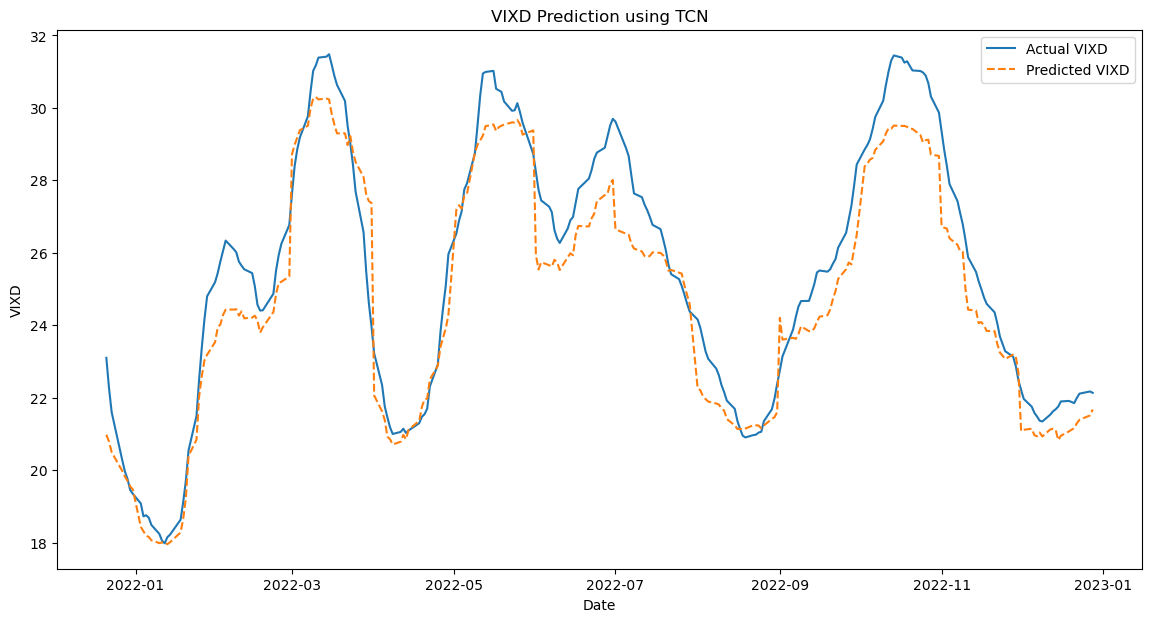

In [4]:
#finbert vader
# Select features and target with a lag of 2 days
lag = 2
X = data[['Overall Positive Sentiment', 'Overall Neutral Sentiment', 'Overall Negative Sentiment', 
          'Positive', 'Neutral', 'Negative', 
          'Average_SPXD', 'Close_SPXD', 'Close_SPXTRD', 'Average_SPXTRD']]

# Apply lag to the features
X_lagged = X.shift(lag)
y = data['Average_VIXD']

# Drop NaN values from the features and target variable
X_lagged = X_lagged.dropna()
y = y.loc[X_lagged.index]

# Apply weights to features
weights = {
    'Overall Positive Sentiment': 0.1,
    'Overall Neutral Sentiment': 0.7,
    'Overall Negative Sentiment': 0.1,
    'Positive': 0.1,
    'Neutral': 0.1,
    'Negative': 0.5,
    'Average_SPXD': 0.9,
    'Close_SPXD': 0.9,
    'Close_SPXTRD': 0.9,
    'Average_SPXTRD': 0.9
}
for col, weight in weights.items():
    X[col] = X[col] * weight

# 确保特征和目标变量的索引对齐
X = X.loc[y.index]
data = data.loc[y.index]  # 同步删除 data 中的对应行

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拆分训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 转换为张量并添加一个维度用于Conv1D
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# 定义TCN模型
def build_tcn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=2, padding='causal', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=32, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=64, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
model = build_tcn_model(input_shape)

# 训练模型
history = model.fit(X_train, y_train, epochs=1800, validation_data=(X_val, y_val), batch_size=32)

# 在验证集上评估模型
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Validation Mean Squared Error: {val_mse}')
print(f'Validation Root Mean Squared Error: {val_rmse}')
print(f'Validation Mean Absolute Error: {val_mae}')
print(f'Validation R^2 Score: {val_r2}')

# 在测试集上评估模型
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test Root Mean Squared Error: {test_rmse}')
print(f'Test Mean Absolute Error: {test_mae}')
print(f'Test R^2 Score: {test_r2}')
# 可视化预测结果
predicted_vixd = model.predict(np.expand_dims(X_scaled, axis=2))
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Average_VIXD'], label='Actual VIXD')
plt.plot(data.index[:len(predicted_vixd)], predicted_vixd, label='Predicted VIXD', linestyle='--')
plt.xlabel('Date')
plt.ylabel('VIXD')
plt.title('VIXD Prediction using TCN')
plt.legend()
plt.show()

In [5]:
import scipy.stats as stats

# 计算F统计量和P值的函数
def calculate_f_p_values(y_true, y_pred, X):
    n = len(y_true)  # 样本数
    k = X.shape[1]  # 特征数
    ssr = np.sum((y_pred.flatten() - y_true.mean()) ** 2)  # 回归平方和
    sse = np.sum((y_true - y_pred.flatten()) ** 2)  # 残差平方和
    msr = ssr / k  # 回归均方
    mse = sse / (n - k - 1)  # 残差均方
    f_stat = msr / mse  # F统计量
    p_value = stats.f.sf(f_stat, k, n - k - 1)  # P值
    return f_stat, p_value

# 对验证集进行计算
f_stat_val, p_value_val = calculate_f_p_values(y_val, y_val_pred, X_val)
print(f'Validation F-statistic: {f_stat_val}')
print(f'Validation P-value: {p_value_val}')

# 对测试集进行计算
f_stat_test, p_value_test = calculate_f_p_values(y_test, y_test_pred, X_test)
print(f'Test F-statistic: {f_stat_test}')
print(f'Test P-value: {p_value_test}')



Validation F-statistic: 26.54529363335699
Validation P-value: 1.3721395350577615e-14
Test F-statistic: 36.91561899599116
Test P-value: 2.4395519525010063e-17


C:\Users\22749\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Train on 154 samples, validate on 51 samples
Epoch 1/1700
154/154 [==============================] - 3s 18ms/sample - loss: 672.2275 - val_loss: 642.5918
Epoch 2/1700
154/154 [==============================] - 0s 458us/sample - loss: 657.3176 - val_loss: 626.8634
Epoch 3/1700
154/154 [==============================] - 0s 463us/sample - loss: 637.6441 - val_loss: 604.3092
Epoch 4/1700
154/154 [==============================] - 0s 521us/sample - loss: 610.0740 - val_loss: 570.1537
Epoch 5/1700
154/154 [==============================] - 0s 502us/sample - loss: 567.2944 - val_loss: 517.8085
Epoch 6/1700
154/154 [==============================] - 0s 532us/sample - loss: 503.5374 - val_loss: 441.2752
Epoch 7/1700
154/154 [==============================] - 0s 530us/sample - loss: 413.3983 - val_loss: 336.5715
Epoch 8/1700
154/154 [==============================] - 0s 516us/sample - loss: 295.1535 - val_loss: 211.1509
Epoch 9/1700
154/154 [==============================] - 0s 516us/sample - lo

Epoch 76/1700
154/154 [==============================] - 0s 836us/sample - loss: 12.4244 - val_loss: 7.0001
Epoch 77/1700
154/154 [==============================] - 0s 612us/sample - loss: 10.4139 - val_loss: 7.1176
Epoch 78/1700
154/154 [==============================] - 0s 524us/sample - loss: 12.8179 - val_loss: 7.1168
Epoch 79/1700
154/154 [==============================] - 0s 743us/sample - loss: 12.3763 - val_loss: 6.7909
Epoch 80/1700
154/154 [==============================] - 0s 566us/sample - loss: 10.9559 - val_loss: 6.8959
Epoch 81/1700
154/154 [==============================] - 0s 572us/sample - loss: 13.0248 - val_loss: 6.6408
Epoch 82/1700
154/154 [==============================] - 0s 614us/sample - loss: 12.0880 - val_loss: 6.6649
Epoch 83/1700
154/154 [==============================] - 0s 650us/sample - loss: 12.0046 - val_loss: 6.6124
Epoch 84/1700
154/154 [==============================] - 0s 774us/sample - loss: 12.2770 - val_loss: 6.4672
Epoch 85/1700
154/154 [=====

Epoch 152/1700
154/154 [==============================] - 0s 413us/sample - loss: 6.8451 - val_loss: 3.6859
Epoch 153/1700
154/154 [==============================] - 0s 503us/sample - loss: 6.5438 - val_loss: 4.5263
Epoch 154/1700
154/154 [==============================] - 0s 651us/sample - loss: 7.2103 - val_loss: 4.0608
Epoch 155/1700
154/154 [==============================] - 0s 749us/sample - loss: 7.2037 - val_loss: 3.6806
Epoch 156/1700
154/154 [==============================] - 0s 1ms/sample - loss: 7.2548 - val_loss: 4.3833
Epoch 157/1700
154/154 [==============================] - 0s 747us/sample - loss: 6.4839 - val_loss: 4.2761
Epoch 158/1700
154/154 [==============================] - 0s 540us/sample - loss: 7.6206 - val_loss: 3.5809
Epoch 159/1700
154/154 [==============================] - 0s 466us/sample - loss: 7.6381 - val_loss: 4.6959
Epoch 160/1700
154/154 [==============================] - 0s 475us/sample - loss: 7.9614 - val_loss: 3.8710
Epoch 161/1700
154/154 [======

Epoch 228/1700
154/154 [==============================] - 0s 556us/sample - loss: 5.8127 - val_loss: 2.7943
Epoch 229/1700
154/154 [==============================] - 0s 672us/sample - loss: 6.0028 - val_loss: 3.5782
Epoch 230/1700
154/154 [==============================] - 0s 555us/sample - loss: 5.3319 - val_loss: 3.6822
Epoch 231/1700
154/154 [==============================] - 0s 502us/sample - loss: 5.7145 - val_loss: 3.2370
Epoch 232/1700
154/154 [==============================] - 0s 508us/sample - loss: 5.4191 - val_loss: 2.9271
Epoch 233/1700
154/154 [==============================] - 0s 437us/sample - loss: 5.7982 - val_loss: 3.4055
Epoch 234/1700
154/154 [==============================] - 0s 375us/sample - loss: 5.3397 - val_loss: 5.3128
Epoch 235/1700
154/154 [==============================] - 0s 644us/sample - loss: 5.9783 - val_loss: 2.8102
Epoch 236/1700
154/154 [==============================] - 0s 388us/sample - loss: 6.9099 - val_loss: 3.6461
Epoch 237/1700
154/154 [====

Epoch 304/1700
154/154 [==============================] - 0s 594us/sample - loss: 6.1576 - val_loss: 3.1629
Epoch 305/1700
154/154 [==============================] - 0s 542us/sample - loss: 5.1634 - val_loss: 2.9639
Epoch 306/1700
154/154 [==============================] - 0s 544us/sample - loss: 5.0454 - val_loss: 3.7880
Epoch 307/1700
154/154 [==============================] - 0s 588us/sample - loss: 3.8053 - val_loss: 2.1863
Epoch 308/1700
154/154 [==============================] - 0s 691us/sample - loss: 4.6097 - val_loss: 2.4720
Epoch 309/1700
154/154 [==============================] - 0s 591us/sample - loss: 5.0825 - val_loss: 4.8102
Epoch 310/1700
154/154 [==============================] - 0s 694us/sample - loss: 4.5424 - val_loss: 3.2834
Epoch 311/1700
154/154 [==============================] - 0s 577us/sample - loss: 4.8298 - val_loss: 2.6450
Epoch 312/1700
154/154 [==============================] - 0s 589us/sample - loss: 4.4245 - val_loss: 3.1186
Epoch 313/1700
154/154 [====

Epoch 380/1700
154/154 [==============================] - 0s 723us/sample - loss: 3.8325 - val_loss: 2.2777
Epoch 381/1700
154/154 [==============================] - 0s 519us/sample - loss: 3.1069 - val_loss: 1.8905
Epoch 382/1700
154/154 [==============================] - 0s 520us/sample - loss: 4.8779 - val_loss: 3.5008
Epoch 383/1700
154/154 [==============================] - 0s 555us/sample - loss: 3.7866 - val_loss: 2.2632
Epoch 384/1700
154/154 [==============================] - 0s 527us/sample - loss: 4.7600 - val_loss: 1.8278
Epoch 385/1700
154/154 [==============================] - 0s 513us/sample - loss: 3.8012 - val_loss: 2.8810
Epoch 386/1700
154/154 [==============================] - 0s 546us/sample - loss: 4.6434 - val_loss: 3.4097
Epoch 387/1700
154/154 [==============================] - 0s 528us/sample - loss: 3.6099 - val_loss: 2.0868
Epoch 388/1700
154/154 [==============================] - 0s 570us/sample - loss: 4.2725 - val_loss: 3.0268
Epoch 389/1700
154/154 [====

Epoch 456/1700
154/154 [==============================] - 0s 350us/sample - loss: 3.1827 - val_loss: 2.5219
Epoch 457/1700
154/154 [==============================] - 0s 399us/sample - loss: 3.2387 - val_loss: 2.4342
Epoch 458/1700
154/154 [==============================] - 0s 424us/sample - loss: 3.2229 - val_loss: 2.4395
Epoch 459/1700
154/154 [==============================] - 0s 403us/sample - loss: 3.0108 - val_loss: 2.1720
Epoch 460/1700
154/154 [==============================] - 0s 474us/sample - loss: 2.8581 - val_loss: 2.8944
Epoch 461/1700
154/154 [==============================] - 0s 552us/sample - loss: 3.4119 - val_loss: 1.9057
Epoch 462/1700
154/154 [==============================] - 0s 518us/sample - loss: 3.1529 - val_loss: 2.0146
Epoch 463/1700
154/154 [==============================] - 0s 532us/sample - loss: 2.9563 - val_loss: 2.0939
Epoch 464/1700
154/154 [==============================] - 0s 520us/sample - loss: 2.8902 - val_loss: 3.0778
Epoch 465/1700
154/154 [====

Epoch 532/1700
154/154 [==============================] - 0s 551us/sample - loss: 2.7331 - val_loss: 2.7665
Epoch 533/1700
154/154 [==============================] - 0s 503us/sample - loss: 3.8456 - val_loss: 1.9370
Epoch 534/1700
154/154 [==============================] - 0s 518us/sample - loss: 3.4262 - val_loss: 3.1849
Epoch 535/1700
154/154 [==============================] - 0s 581us/sample - loss: 2.8847 - val_loss: 2.1182
Epoch 536/1700
154/154 [==============================] - 0s 511us/sample - loss: 3.1571 - val_loss: 2.4006
Epoch 537/1700
154/154 [==============================] - 0s 516us/sample - loss: 2.8895 - val_loss: 2.2120
Epoch 538/1700
154/154 [==============================] - 0s 470us/sample - loss: 2.6229 - val_loss: 2.4751
Epoch 539/1700
154/154 [==============================] - 0s 549us/sample - loss: 2.5703 - val_loss: 4.0409
Epoch 540/1700
154/154 [==============================] - 0s 557us/sample - loss: 2.5685 - val_loss: 2.3704
Epoch 541/1700
154/154 [====

Epoch 608/1700
154/154 [==============================] - 0s 465us/sample - loss: 2.8367 - val_loss: 2.4210
Epoch 609/1700
154/154 [==============================] - 0s 427us/sample - loss: 2.4806 - val_loss: 2.1240
Epoch 610/1700
154/154 [==============================] - 0s 437us/sample - loss: 2.2168 - val_loss: 1.5466
Epoch 611/1700
154/154 [==============================] - 0s 405us/sample - loss: 3.0522 - val_loss: 3.0411
Epoch 612/1700
154/154 [==============================] - 0s 417us/sample - loss: 2.3249 - val_loss: 2.3530
Epoch 613/1700
154/154 [==============================] - 0s 417us/sample - loss: 2.7003 - val_loss: 2.7879
Epoch 614/1700
154/154 [==============================] - 0s 472us/sample - loss: 2.6645 - val_loss: 2.3336
Epoch 615/1700
154/154 [==============================] - 0s 526us/sample - loss: 2.2347 - val_loss: 1.4566
Epoch 616/1700
154/154 [==============================] - 0s 732us/sample - loss: 2.8910 - val_loss: 3.2560
Epoch 617/1700
154/154 [====

Epoch 684/1700
154/154 [==============================] - 0s 557us/sample - loss: 2.4425 - val_loss: 2.1175
Epoch 685/1700
154/154 [==============================] - 0s 508us/sample - loss: 3.1007 - val_loss: 2.7350
Epoch 686/1700
154/154 [==============================] - 0s 491us/sample - loss: 2.1902 - val_loss: 3.4597
Epoch 687/1700
154/154 [==============================] - 0s 594us/sample - loss: 2.3724 - val_loss: 1.9122
Epoch 688/1700
154/154 [==============================] - 0s 496us/sample - loss: 2.8798 - val_loss: 3.3863
Epoch 689/1700
154/154 [==============================] - 0s 505us/sample - loss: 2.8377 - val_loss: 3.9175
Epoch 690/1700
154/154 [==============================] - 0s 484us/sample - loss: 2.3357 - val_loss: 1.1228
Epoch 691/1700
154/154 [==============================] - 0s 494us/sample - loss: 2.6379 - val_loss: 3.2160
Epoch 692/1700
154/154 [==============================] - 0s 495us/sample - loss: 2.9846 - val_loss: 3.9404
Epoch 693/1700
154/154 [====

Epoch 760/1700
154/154 [==============================] - 0s 523us/sample - loss: 2.4330 - val_loss: 1.7182
Epoch 761/1700
154/154 [==============================] - 0s 525us/sample - loss: 2.6319 - val_loss: 2.3431
Epoch 762/1700
154/154 [==============================] - 0s 543us/sample - loss: 2.4711 - val_loss: 2.4625
Epoch 763/1700
154/154 [==============================] - 0s 558us/sample - loss: 2.1839 - val_loss: 2.0888
Epoch 764/1700
154/154 [==============================] - 0s 518us/sample - loss: 2.7330 - val_loss: 2.8412
Epoch 765/1700
154/154 [==============================] - 0s 505us/sample - loss: 2.9473 - val_loss: 2.3084
Epoch 766/1700
154/154 [==============================] - 0s 540us/sample - loss: 2.4329 - val_loss: 1.1540
Epoch 767/1700
154/154 [==============================] - 0s 459us/sample - loss: 2.0819 - val_loss: 2.9420
Epoch 768/1700
154/154 [==============================] - 0s 512us/sample - loss: 2.6542 - val_loss: 2.0608
Epoch 769/1700
154/154 [====

Epoch 836/1700
154/154 [==============================] - 0s 748us/sample - loss: 2.1907 - val_loss: 2.1601
Epoch 837/1700
154/154 [==============================] - 0s 655us/sample - loss: 2.0018 - val_loss: 1.6133
Epoch 838/1700
154/154 [==============================] - 0s 521us/sample - loss: 2.2497 - val_loss: 2.1426
Epoch 839/1700
154/154 [==============================] - 0s 480us/sample - loss: 2.1151 - val_loss: 2.7404
Epoch 840/1700
154/154 [==============================] - 0s 525us/sample - loss: 2.0812 - val_loss: 1.8283
Epoch 841/1700
154/154 [==============================] - 0s 507us/sample - loss: 2.0744 - val_loss: 1.5983
Epoch 842/1700
154/154 [==============================] - 0s 498us/sample - loss: 2.4899 - val_loss: 2.7746
Epoch 843/1700
154/154 [==============================] - 0s 539us/sample - loss: 2.2377 - val_loss: 1.3011
Epoch 844/1700
154/154 [==============================] - 0s 584us/sample - loss: 1.9749 - val_loss: 1.9427
Epoch 845/1700
154/154 [====

Epoch 912/1700
154/154 [==============================] - 0s 582us/sample - loss: 1.5858 - val_loss: 1.2157
Epoch 913/1700
154/154 [==============================] - 0s 574us/sample - loss: 2.2411 - val_loss: 1.3858
Epoch 914/1700
154/154 [==============================] - 0s 625us/sample - loss: 1.9836 - val_loss: 2.0994
Epoch 915/1700
154/154 [==============================] - 0s 968us/sample - loss: 2.2496 - val_loss: 2.6568
Epoch 916/1700
154/154 [==============================] - 0s 515us/sample - loss: 2.1269 - val_loss: 1.6293
Epoch 917/1700
154/154 [==============================] - 0s 575us/sample - loss: 2.2077 - val_loss: 1.0499
Epoch 918/1700
154/154 [==============================] - 0s 537us/sample - loss: 2.1898 - val_loss: 1.4925
Epoch 919/1700
154/154 [==============================] - 0s 875us/sample - loss: 2.2477 - val_loss: 2.4494
Epoch 920/1700
154/154 [==============================] - 0s 511us/sample - loss: 2.1791 - val_loss: 2.1591
Epoch 921/1700
154/154 [====

Epoch 988/1700
154/154 [==============================] - 0s 526us/sample - loss: 2.1554 - val_loss: 1.4006
Epoch 989/1700
154/154 [==============================] - 0s 515us/sample - loss: 2.4123 - val_loss: 1.1755
Epoch 990/1700
154/154 [==============================] - 0s 468us/sample - loss: 2.2153 - val_loss: 2.9943
Epoch 991/1700
154/154 [==============================] - 0s 450us/sample - loss: 1.7731 - val_loss: 1.3636
Epoch 992/1700
154/154 [==============================] - 0s 462us/sample - loss: 2.1921 - val_loss: 1.4778
Epoch 993/1700
154/154 [==============================] - 0s 378us/sample - loss: 1.8852 - val_loss: 2.0033
Epoch 994/1700
154/154 [==============================] - 0s 396us/sample - loss: 2.3706 - val_loss: 1.8924
Epoch 995/1700
154/154 [==============================] - 0s 415us/sample - loss: 2.0631 - val_loss: 1.0033
Epoch 996/1700
154/154 [==============================] - 0s 441us/sample - loss: 2.1349 - val_loss: 3.0473
Epoch 997/1700
154/154 [====

154/154 [==============================] - 0s 486us/sample - loss: 1.4804 - val_loss: 1.5668
Epoch 1139/1700
154/154 [==============================] - 0s 461us/sample - loss: 1.6011 - val_loss: 2.0319
Epoch 1140/1700
154/154 [==============================] - 0s 299us/sample - loss: 1.5721 - val_loss: 1.2744
Epoch 1141/1700
154/154 [==============================] - 0s 330us/sample - loss: 2.2973 - val_loss: 2.1632
Epoch 1142/1700
154/154 [==============================] - 0s 294us/sample - loss: 2.1060 - val_loss: 1.0403
Epoch 1143/1700
154/154 [==============================] - 0s 351us/sample - loss: 1.7557 - val_loss: 1.3796
Epoch 1144/1700
154/154 [==============================] - 0s 349us/sample - loss: 1.6725 - val_loss: 2.0911
Epoch 1145/1700
154/154 [==============================] - 0s 308us/sample - loss: 2.0025 - val_loss: 1.6262
Epoch 1146/1700
154/154 [==============================] - 0s 310us/sample - loss: 2.4267 - val_loss: 1.4547
Epoch 1147/1700
154/154 [==========

154/154 [==============================] - 0s 485us/sample - loss: 1.3789 - val_loss: 1.6513
Epoch 1289/1700
154/154 [==============================] - 0s 376us/sample - loss: 2.1189 - val_loss: 1.4741
Epoch 1290/1700
154/154 [==============================] - 0s 422us/sample - loss: 1.6295 - val_loss: 0.7677
Epoch 1291/1700
154/154 [==============================] - 0s 329us/sample - loss: 2.4369 - val_loss: 2.4719
Epoch 1292/1700
154/154 [==============================] - 0s 338us/sample - loss: 1.6186 - val_loss: 0.7093
Epoch 1293/1700
154/154 [==============================] - 0s 278us/sample - loss: 1.9237 - val_loss: 1.9921
Epoch 1294/1700
154/154 [==============================] - 0s 286us/sample - loss: 1.8393 - val_loss: 1.3037
Epoch 1295/1700
154/154 [==============================] - 0s 274us/sample - loss: 1.7002 - val_loss: 1.4886
Epoch 1296/1700
154/154 [==============================] - 0s 289us/sample - loss: 1.5356 - val_loss: 1.6473
Epoch 1297/1700
154/154 [==========

154/154 [==============================] - 0s 277us/sample - loss: 1.5112 - val_loss: 1.6632
Epoch 1439/1700
154/154 [==============================] - 0s 300us/sample - loss: 1.4090 - val_loss: 1.0429
Epoch 1440/1700
154/154 [==============================] - 0s 660us/sample - loss: 1.9394 - val_loss: 1.9927
Epoch 1441/1700
154/154 [==============================] - 0s 405us/sample - loss: 1.6625 - val_loss: 0.9765
Epoch 1442/1700
154/154 [==============================] - 0s 318us/sample - loss: 1.3084 - val_loss: 1.3137
Epoch 1443/1700
154/154 [==============================] - 0s 266us/sample - loss: 1.3440 - val_loss: 1.2620
Epoch 1444/1700
154/154 [==============================] - 0s 258us/sample - loss: 1.3696 - val_loss: 2.1950
Epoch 1445/1700
154/154 [==============================] - 0s 299us/sample - loss: 1.5234 - val_loss: 1.1327
Epoch 1446/1700
154/154 [==============================] - 0s 283us/sample - loss: 1.5343 - val_loss: 0.8797
Epoch 1447/1700
154/154 [==========

154/154 [==============================] - 0s 505us/sample - loss: 1.5912 - val_loss: 2.3046
Epoch 1589/1700
154/154 [==============================] - 0s 455us/sample - loss: 1.5730 - val_loss: 1.3145
Epoch 1590/1700
154/154 [==============================] - 0s 426us/sample - loss: 1.5925 - val_loss: 1.3747
Epoch 1591/1700
154/154 [==============================] - 0s 467us/sample - loss: 1.2946 - val_loss: 1.5078
Epoch 1592/1700
154/154 [==============================] - 0s 399us/sample - loss: 1.5385 - val_loss: 1.4759
Epoch 1593/1700
154/154 [==============================] - 0s 420us/sample - loss: 1.5179 - val_loss: 1.3762
Epoch 1594/1700
154/154 [==============================] - 0s 438us/sample - loss: 1.9200 - val_loss: 1.3352
Epoch 1595/1700
154/154 [==============================] - 0s 397us/sample - loss: 1.3243 - val_loss: 1.2920
Epoch 1596/1700
154/154 [==============================] - 0s 418us/sample - loss: 1.6513 - val_loss: 1.3812
Epoch 1597/1700
154/154 [==========

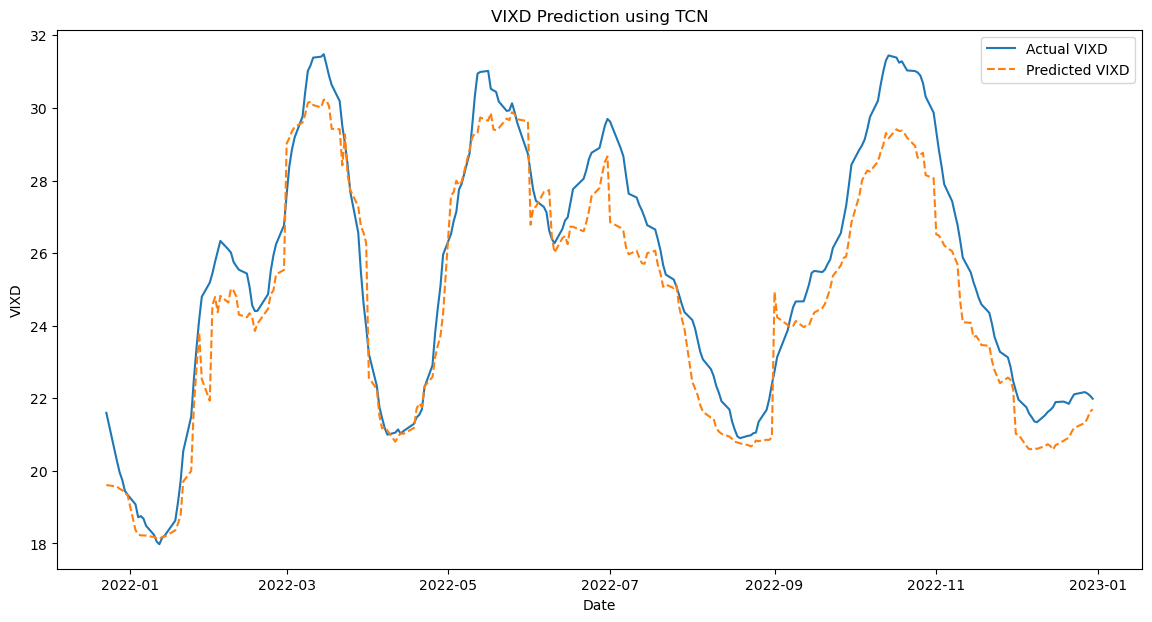

In [23]:
#textblob vader
# Select features and target with a lag of 2 days
lag = 2
X = data[[
          'Polarity', 'Subjectivity', 
          'Positive', 'Neutral', 'Negative', 
          'Average_SPXD', 'Close_SPXD', 'Close_SPXTRD', 'Average_SPXTRD']]

# Apply lag to the features
X_lagged = X.shift(lag)
y = data['Average_VIXD']

# Drop NaN values from the features and target variable
X_lagged = X_lagged.dropna()
y = y.loc[X_lagged.index]

# Apply weights to features
weights = {
    'Polarity': 0.8,
    'Subjectivity': 0.5,
    'Positive': 0.1,
    'Neutral': 0.1,
    'Negative': 0.5,
    'Average_SPXD': 0.9,
    'Close_SPXD': 0.9,
    'Close_SPXTRD': 0.9,
    'Average_SPXTRD': 0.9
}
for col, weight in weights.items():
    X[col] = X[col] * weight

# 确保特征和目标变量的索引对齐
X = X.loc[y.index]
data = data.loc[y.index]  # 同步删除 data 中的对应行

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拆分训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 转换为张量并添加一个维度用于Conv1D
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# 定义TCN模型
def build_tcn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=2, padding='causal', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=32, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=64, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
model = build_tcn_model(input_shape)

# 训练模型
history = model.fit(X_train, y_train, epochs=1700, validation_data=(X_val, y_val), batch_size=32)

# 在验证集上评估模型
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Validation Mean Squared Error: {val_mse}')
print(f'Validation Root Mean Squared Error: {val_rmse}')
print(f'Validation Mean Absolute Error: {val_mae}')
print(f'Validation R^2 Score: {val_r2}')

# 在测试集上评估模型
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test Root Mean Squared Error: {test_rmse}')
print(f'Test Mean Absolute Error: {test_mae}')
print(f'Test R^2 Score: {test_r2}')
# 可视化预测结果
predicted_vixd = model.predict(np.expand_dims(X_scaled, axis=2))
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Average_VIXD'], label='Actual VIXD')
plt.plot(data.index[:len(predicted_vixd)], predicted_vixd, label='Predicted VIXD', linestyle='--')
plt.xlabel('Date')
plt.ylabel('VIXD')
plt.title('VIXD Prediction using TCN')
plt.legend()
plt.show()

In [24]:
import scipy.stats as stats

# 计算F统计量和P值的函数
def calculate_f_p_values(y_true, y_pred, X):
    n = len(y_true)  # 样本数
    k = X.shape[1]  # 特征数
    ssr = np.sum((y_pred.flatten() - y_true.mean()) ** 2)  # 回归平方和
    sse = np.sum((y_true - y_pred.flatten()) ** 2)  # 残差平方和
    msr = ssr / k  # 回归均方
    mse = sse / (n - k - 1)  # 残差均方
    f_stat = msr / mse  # F统计量
    p_value = stats.f.sf(f_stat, k, n - k - 1)  # P值
    return f_stat, p_value

# 对验证集进行计算
f_stat_val, p_value_val = calculate_f_p_values(y_val, y_val_pred, X_val)
print(f'Validation F-statistic: {f_stat_val}')
print(f'Validation P-value: {p_value_val}')

# 对测试集进行计算
f_stat_test, p_value_test = calculate_f_p_values(y_test, y_test_pred, X_test)
print(f'Test F-statistic: {f_stat_test}')
print(f'Test P-value: {p_value_test}')



Validation F-statistic: 36.78637796469749
Validation P-value: 7.547837850421555e-17
Test F-statistic: 37.12566468274846
Test P-value: 3.5511427884757254e-17


In [ ]:
#textblob vader
# Select features and target with a lag of 2 days
lag = 2
X = data[[
          'Polarity', 'Subjectivity', 
          'Positive', 'Neutral', 'Negative', 
          'Average_SPXD', 'Close_SPXD', 'Close_SPXTRD', 'Average_SPXTRD']]

# Apply lag to the features
X_lagged = X.shift(lag)
y = data['Average_VIXD']

# Drop NaN values from the features and target variable
X_lagged = X_lagged.dropna()
y = y.loc[X_lagged.index]

# Apply weights to features
weights = {
    'Polarity': 0.8,
    'Subjectivity': 0.5,
    'Positive': 0.1,
    'Neutral': 0.1,
    'Negative': 0.5,
    'Average_SPXD': 0.9,
    'Close_SPXD': 0.9,
    'Close_SPXTRD': 0.9,
    'Average_SPXTRD': 0.9
}
for col, weight in weights.items():
    X[col] = X[col] * weight